# Step 1: Reading and Understanding the Data

In [596]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [597]:
# Import necessary libraries

import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [598]:
# to display all coulmns of a dataframe
pd.set_option('display.max_column', None)

# to display all rows of a dataframe
pd.set_option('display.max_rows', None)

# to display all items of a long sequence
pd.set_option('display.max_seq_items', None)

# to display complete contents inside a cell in dataframe
pd.set_option('display.max_colwidth', None)

pd.set_option('expand_frame_repr', True)

In [599]:
# reading the dataset
raw_data = pd.read_csv("train.csv", encoding = 'utf-8')
raw_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [600]:
# Check the dimensions
raw_data.shape

(1460, 81)

In [601]:
# Check for column details
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Looking at the data types of all columns and comparing them with the data description of each columns, we deduce that the data types of the below mentioned non binary columns needs to be converted to object data type as these can be classfied as categorical variable:
- MSSubClass
- verallQual
- OverallCond

In [602]:
raw_data[['MSSubClass', 'OverallQual', 'OverallCond']] = raw_data[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

#### Map All Non-binary Categorical Columns to their Orignal Values

In [603]:
raw_data.MSSubClass = raw_data.MSSubClass.map({20:'1-STORY 1946 & NEWER ALL STYLES', 
                                               30:"1-STORY 1945 & OLDER", 
                                               40:"1-STORY W/FINISHED ATTIC ALL AGES", 
                                               50:"1-1/2 STORY FINISHED ALL AGES",
                                               60:"2-STORY 1946 & NEWER",
                                               70:"2-STORY 1945 & OLDER",
                                               75:"2-1/2 STORY ALL AGES",
                                               80:"SPLIT OR MULTI-LEVEL",
                                               85:"SPLIT FOYER",
                                               90:"DUPLEX - ALL STYLES AND AGES",
                                               120:"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
                                               150:"1-1/2 STORY PUD - ALL AGES",
                                               160:"2-STORY PUD - 1946 & NEWER",
                                               180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
                                               190:"2 FAMILY CONVERSION - ALL STYLES AND AGES"})


raw_data.OverallQual = raw_data.OverallQual.map({10:"Very Excellent",
                                                 9:"Excellent",
                                                 8:"Very Good",
                                                 7:"Good",
                                                 6:"Above Average",
                                                 5:"Average",
                                                 4:"Below Average",
                                                 3:"Fair",
                                                 2:"Poor",
                                                 1:"Very Poor"})

raw_data.OverallCond = raw_data.OverallCond.map({10:"Very Excellent",
                                                 9:"Excellent",
                                                 8:"Very Good",
                                                 7:"Good",
                                                 6:"Above Average",
                                                 5:"Average",
                                                 4:"Below Average",
                                                 3:"Fair",
                                                 2:"Poor",
                                                 1:"Very Poor"})
        

In [604]:
# To get the description of the dataset
raw_data.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452   
std     181.066207   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea  \
count   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000   
mean       6.517808     0.613014  1978.506164     1.767123   472.980137   
std        1.625393     0.644666    24.689725     0.747315   213.804841   
min        2.000000     0.000000  1900.000000     0.000000     0.000000   
25%        5.000000     0.000000  1961.000000     1.000000   334.500000   
50%        6.000000     1.000000  1980.000000     2.000000   480.000000   
75%        7.000000     1.000000  2002.000000     2.000000   576.000000   
max       14.000000     3.000000  2010.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.00

# Step 2: Handling null & missing values

### Check percentage nulls

In [605]:
round(100*(raw_data.isnull().sum()/len(raw_data.index)), 2).sort_values(ascending = False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageType        5.55
GarageYrBlt       5.55
GarageQual        5.55
GarageCond        5.55
GarageFinish      5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MSSubClass        0.82
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
BedroomAbvGr      0.00
HalfBath          0.00
Functional        0.00
TotRmsAbvGrd      0.00
FullBath          0.00
Fireplaces        0.00
KitchenAbvGr      0.00
BsmtHalfBath      0.00
KitchenQual       0.00
Id                0.00
GrLivArea         0.00
GarageCars        0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType   

#### Copying the dataframe into new dataframe

In [606]:
clean_data = raw_data.copy()
raw_data.shape

(1460, 81)

In [607]:
#Checking for outlier in the numerical columns
raw_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
90%    1314.100000    96.000000   14381.700000  2006.000000   2006.000000   
95%    1387.050000   107.000000   17401.150000  2007.000000   2007.000000   
99%    1445.410000   141.000000   37567.640000  2009.000000   2009.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452   
std     181.066207   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000   
90%     335.000000  1065.500000   117.200000  1232.000000  1602.200000   
95%     456.000000  1274.000000   396.200000  1468.000000  1753.000000   
99%     791.920000  1572.410000   830.380000  1797.050000  2155.050000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
90%    1680.000000   954.200000      0.000000  2158.300000      1.000000   
95%    1831.250000  1141.050000      0.000000  2466.100000      1.000000   
99%    2219.460000  1418.920000    360.000000  3123.480000      2.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
90%        0.000000     2.000000     1.000000      4.000000      1.000000   
95%        1.000000     2.000000     1.000000      4.000000      1.000000   
99%        1.000000     3.000000     1.000000      5.000000      2.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea  \
count   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000   
mean       6.517808     0.613014  1978.506164     1.767123   472.980137   
std        1.625393     0.644666    24.689725     0.747315   213.804841   
min        2.000000     0.000000  1900.000000     0.000000     0

In [608]:
def null_percent(data):
    data.columns[data.isnull().any()] 

    null = round(data.isnull().sum()/len(data)*100,2)
    null = null[null>0]
    null.sort_values(inplace=True, ascending=False)
    null_df= pd.DataFrame(null,columns=["Null Percentage"])
    null_df.index.name ='Feature'
    return null_df

#### since, it is clear that there are multiple columns with high nulls, lets group them together

In [609]:
null_data_df = null_percent(raw_data)
null_data_df

Null Percentage
Feature                      
PoolQC                  99.52
MiscFeature             96.30
Alley                   93.77
Fence                   80.75
FireplaceQu             47.26
LotFrontage             17.74
GarageCond               5.55
GarageType               5.55
GarageYrBlt              5.55
GarageFinish             5.55
GarageQual               5.55
BsmtExposure             2.60
BsmtFinType2             2.60
BsmtQual                 2.53
BsmtCond                 2.53
BsmtFinType1             2.53
MSSubClass               0.82
MasVnrArea               0.55
MasVnrType               0.55
Electrical               0.07

#### Dropping the 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu'column becuase there are so many missing values and id column is not required

In [610]:
clean_data = clean_data.drop(['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu'],axis=1)
clean_data.shape

(1460, 75)

#### Check nulls once again

In [611]:
null_data_df = null_percent(clean_data)
null_data_df

Null Percentage
Feature                      
LotFrontage             17.74
GarageType               5.55
GarageYrBlt              5.55
GarageFinish             5.55
GarageQual               5.55
GarageCond               5.55
BsmtExposure             2.60
BsmtFinType2             2.60
BsmtQual                 2.53
BsmtCond                 2.53
BsmtFinType1             2.53
MSSubClass               0.82
MasVnrType               0.55
MasVnrArea               0.55
Electrical               0.07

#### Categorical columns


In [612]:
categorical_col = clean_data.select_dtypes(include='object').columns
categorical_col

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

#### Numeric columns

In [613]:
Numerical_col = clean_data.select_dtypes(exclude='object').columns
Numerical_col

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

#### Observe the columsn with highest percentage of missing values

In [614]:
for i in null_data_df.index:
    print(f'observations for feature : {i}')
    print(clean_data[i].describe())

observations for feature : LotFrontage
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
observations for feature : GarageType
count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object
observations for feature : GarageYrBlt
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
observations for feature : GarageFinish
count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object
observations for feature : GarageQual
count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object
observations for feature : GarageCond
count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, 

#### Impute the missing values for the Numerical columns with the median since these feature contains outliers as evident from above observations. 

In [615]:
for col in null_data_df.index:
    if col in list(Numerical_col):
        clean_data[col] = clean_data[col].fillna(clean_data[col].median())    

#### Impute the missing values for the Categorical columns with the mode values.

In [616]:
for col in null_data_df.index:
    if col in list(categorical_col):
        clean_data[col] = clean_data[col].fillna(clean_data[col].mode()[0])    

In [617]:
null_data_df = null_percent(clean_data)
null_data_df

Empty DataFrame
Columns: [Null Percentage]
Index: []

In [618]:
clean_data.shape

(1460, 75)

Hence all the Null data are handled

# Step 3 : Exploratory Data Analysis (EDA)

In [619]:
clean_data.describe()

LotFrontage        LotArea    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1460.000000    1460.000000  1460.000000   1460.000000  1460.000000   
mean     69.863699   10516.828082  1971.267808   1984.865753   103.117123   
std      22.027677    9981.264932    30.202904     20.645407   180.731373   
min      21.000000    1300.000000  1872.000000   1950.000000     0.000000   
25%      60.000000    7553.500000  1954.000000   1967.000000     0.000000   
50%      69.000000    9478.500000  1973.000000   1994.000000     0.000000   
75%      79.000000   11601.500000  2000.000000   2004.000000   164.250000   
max     313.000000  215245.000000  2010.000000   2010.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712   
std     456.098091   161.319273   441.866955   438.705324   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   223.000000   795.750000   882.000000   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000   
mean    346.992466      5.844521  1515.463699      0.425342      0.057534   
std     436.528436     48.623081   525.480383      0.518911      0.238753   
min       0.000000      0.000000   334.000000      0.000000      0.000000   
25%       0.000000      0.000000  1129.500000      0.000000      0.000000   
50%       0.000000      0.000000  1464.000000      0.000000      0.000000   
75%     728.000000      0.000000  1776.750000      1.000000      0.000000   
max    2065.000000    572.000000  5642.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000   
mean      1.565068     0.382877      2.866438      1.046575      6.517808   
std       0.550916     0.502885      0.815778      0.220338      1.625393   
min       0.000000     0.000000      0.000000      0.000000      2.000000   
25%       1.000000     0.000000      2.000000      1.000000      5.000000   
50%       2.000000     0.000000      3.000000      1.000000      6.000000   
75%       2.000000     1.000000      3.000000      1.000000      7.000000   
max       3.000000     2.000000      8.000000      3.000000     14.000000   

        Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014  1978.589041     1.767123   472.980137    94.244521   
std       0.644666    23.997022     0.747315   213.804841   125.338794   
min       0.000000  1900.000000     0.000000     0.000000     0.000000   
25%       0.000000  1962.000000     1.000000   334.500000     0.000000   
50%       1.000000  1980.000000     2.000000   480.000000     0.000000   
75%       1.000000  2001.000000     2.000000   576.000000   168.000000   
max       3.000000  2010.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000

## Univariate Analysis

Lets check how our target variable "SalesPrice" looks

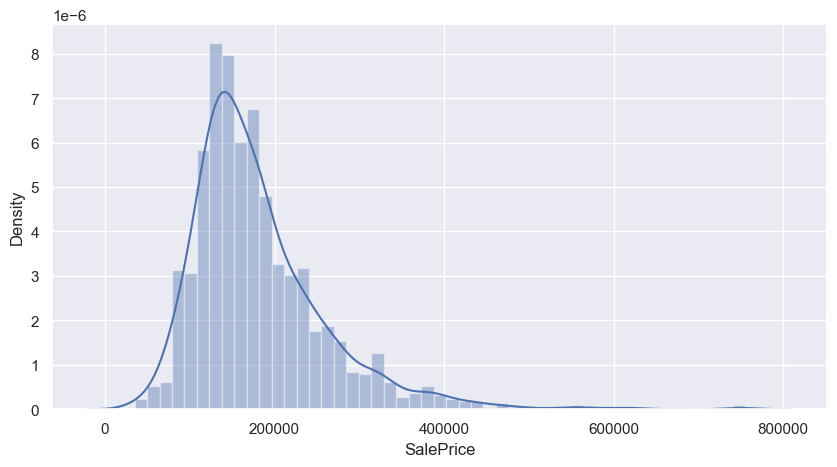

In [620]:
plt.figure(figsize=[10,5])
sns.set_style('darkgrid')
sns.distplot(clean_data['SalePrice'])
plt.show()

In [621]:
# Check the skewness of target variable
clean_data['SalePrice'].skew()

1.8828757597682129

In [622]:
# Check the kurtosis of target variable
clean_data['SalePrice'].kurt()

6.536281860064529

As can be seen from above figure and analysis,the Target Variable ("SalesPrice") is Right-Skewed.
Since the skewness and kurtosis of the target variables are greater than 1, we need to log transform the target variable.

In [623]:
# Log transform the target variable
clean_data['SalePrice'] = np.log(clean_data['SalePrice'])

In [624]:
# Check the skewness of target variable
clean_data['SalePrice'].skew()

0.12133506220520406

In [625]:
# Check the kurtosis of target variable
clean_data['SalePrice'].kurt()

0.8095319958036296

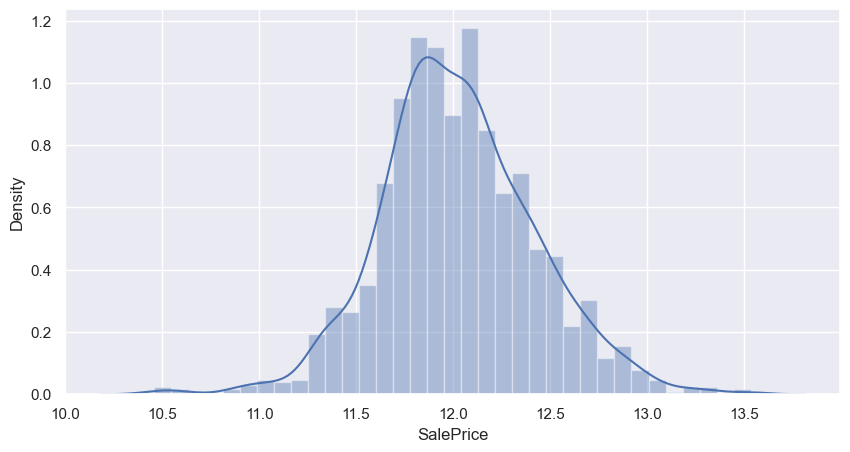

In [626]:
plt.figure(figsize=[10,5])
sns.set_style('darkgrid')
sns.distplot(clean_data['SalePrice'])
plt.show()

So, our target variable has normal distribution now.

#### Divide the dataframe df into numerical and categorical columns for EDA

In [627]:
df_numeric = clean_data[Numerical_col]
df_numeric.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             8           0       2003.0           2   
1             1             6           1       1976.0           2   
2             1             6           1       2001.0           2   
3             1             7           1       1998.0           3   
4             1             9           1       2000.0           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2008  12.247694  
1         0        0       5    2007  12.109011  
2         0        0       9    2008  12.317167  
3         0        0       2    2006  11.849398  
4         0        0      12    2008  12.429216

In [628]:
df_category = clean_data[categorical_col]
df_category.head()

MSSubClass MSZoning Street LotShape LandContour  \
0             2-STORY 1946 & NEWER       RL   Pave      Reg         Lvl   
1  1-STORY 1946 & NEWER ALL STYLES       RL   Pave      Reg         Lvl   
2             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   
3             2-STORY 1945 & OLDER       RL   Pave      IR1         Lvl   
4             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle    OverallQual OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story           Good     Average     Gable  CompShg     VinylSd   
1     1Story  Above Average   Very Good     Gable  CompShg     MetalSd   
2     2Story           Good     Average     Gable  CompShg     VinylSd   
3     2Story           Good     Average     Gable  CompShg     Wd Sdng   
4     2Story      Very Good     Average     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
1     MetalSd       None        TA        TA     CBlock       Gd       TA   
2     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
3     Wd Shng       None        TA        TA     BrkTil       TA       Gd   
4     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
0           No          GLQ          Unf    GasA        Ex          Y   
1           Gd          ALQ          Unf    GasA        Ex          Y   
2           Mn          GLQ          Unf    GasA        Ex          Y   
3           No          ALQ          Unf    GasA        Gd          Y   
4           Av          GLQ          Unf    GasA        Ex          Y   

  Electrical KitchenQual Functional GarageType GarageFinish GarageQual  \
0      SBrkr          Gd        Typ     Attchd          RFn         TA   
1      SBrkr          TA        Typ     Attchd          RFn         TA   
2      SBrkr          Gd        Typ     Attchd          RFn         TA   
3      SBrkr          Gd        Typ     Detchd          Unf         TA   
4      SBrkr          Gd        Typ     Attchd          RFn         TA   

  GarageCond PavedDrive SaleType SaleCondition  
0         TA          Y       WD        Normal  
1         TA          Y       WD        Normal  
2         TA          Y       WD        Normal  
3         TA          Y       WD       Abnorml  
4         TA          Y       WD        Normal

### Univariate Analysis on Numeric Columns

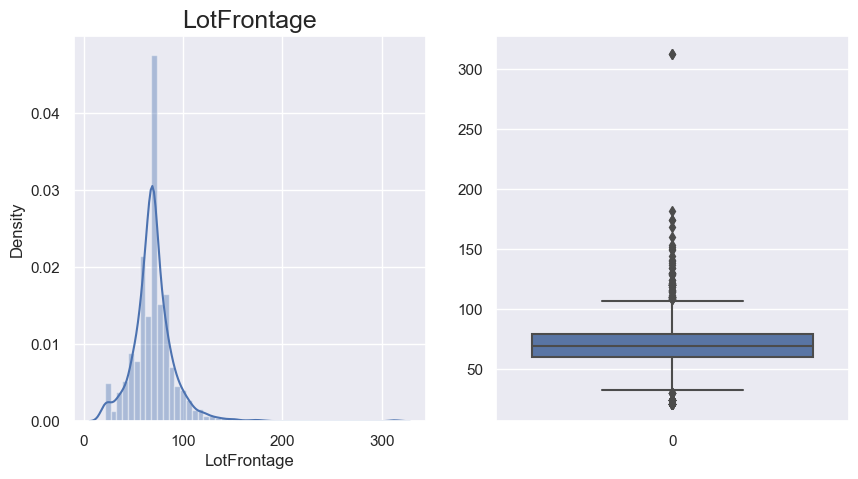

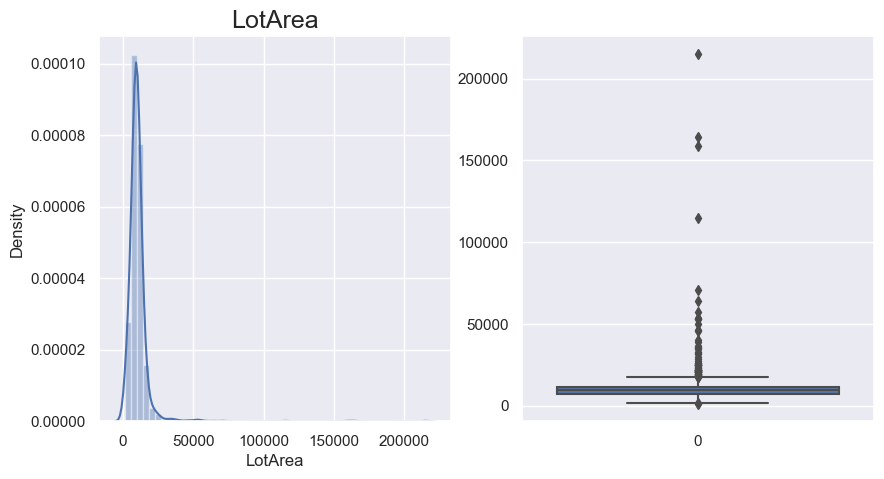

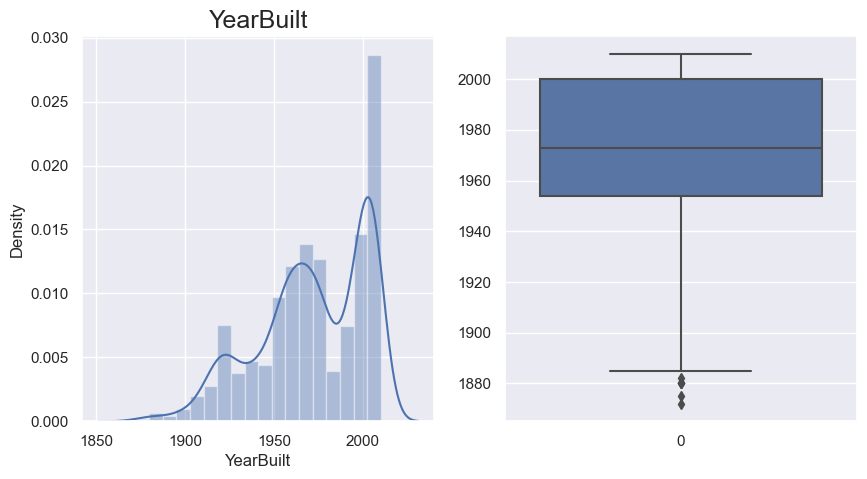

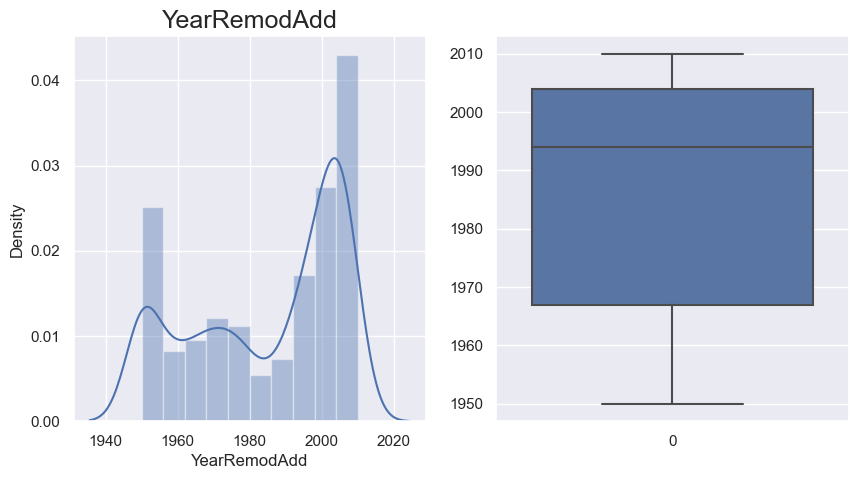

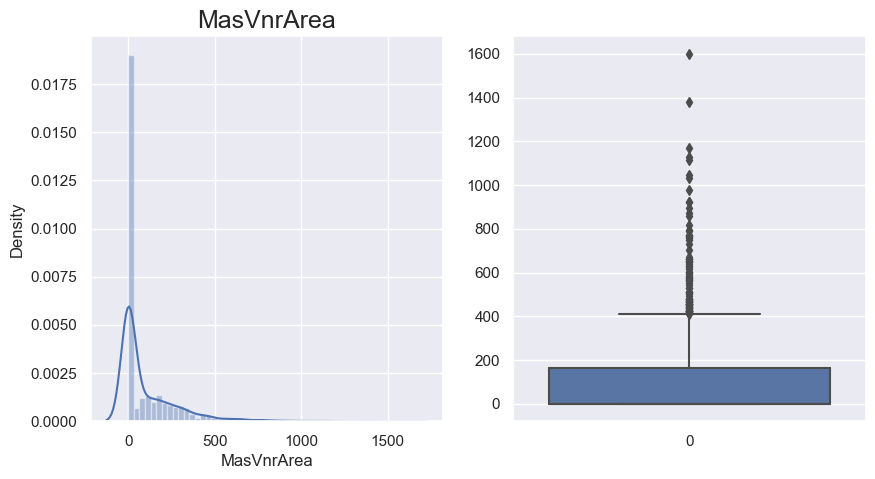

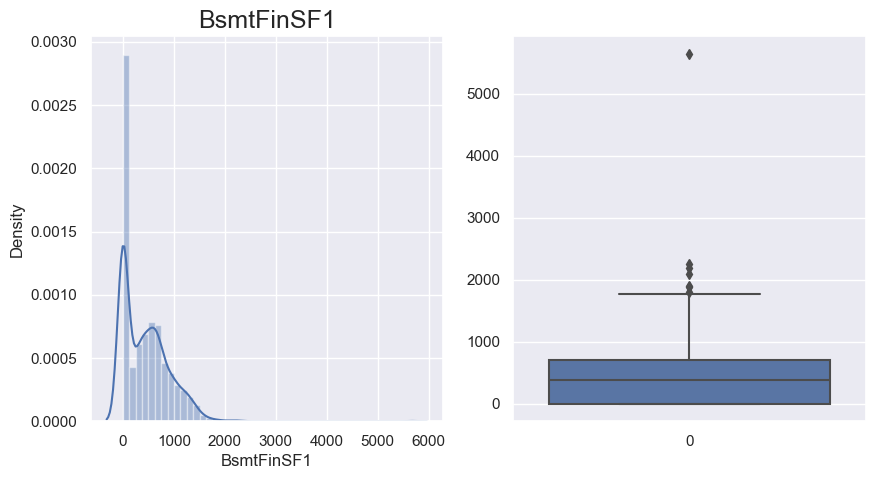

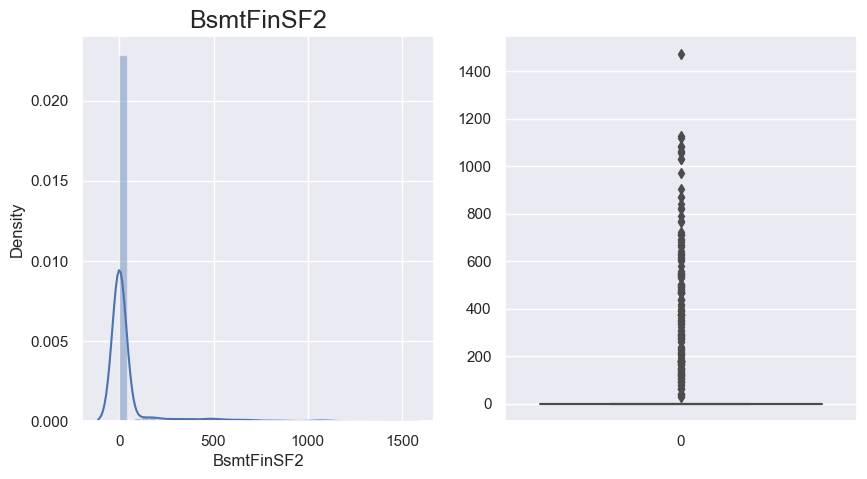

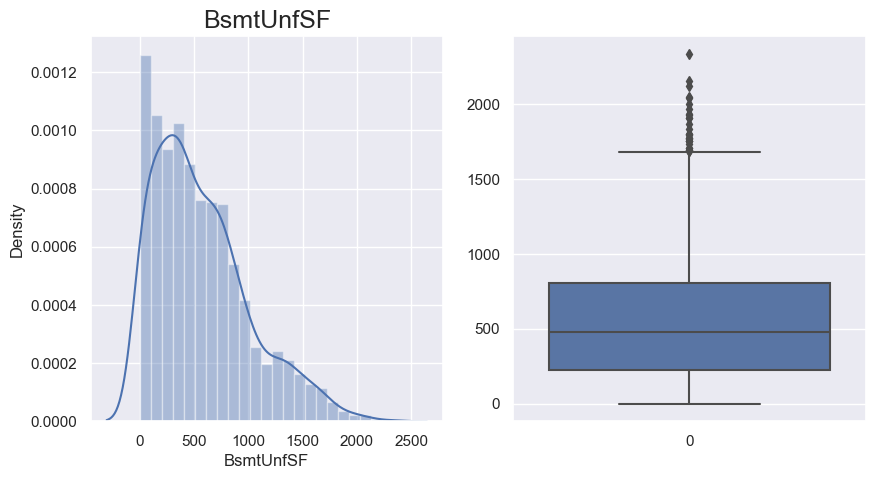

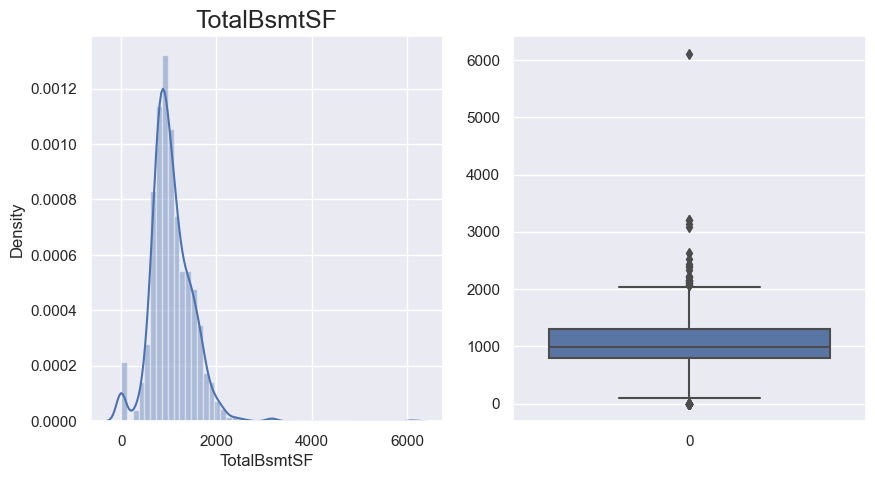

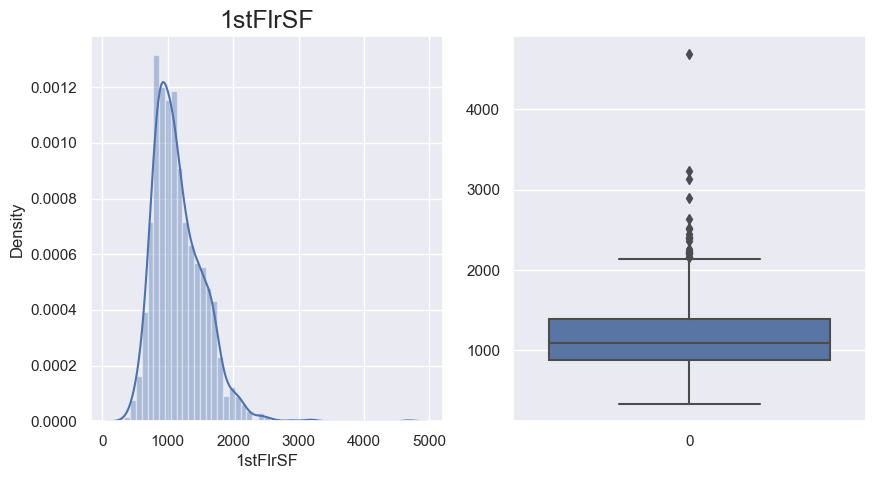

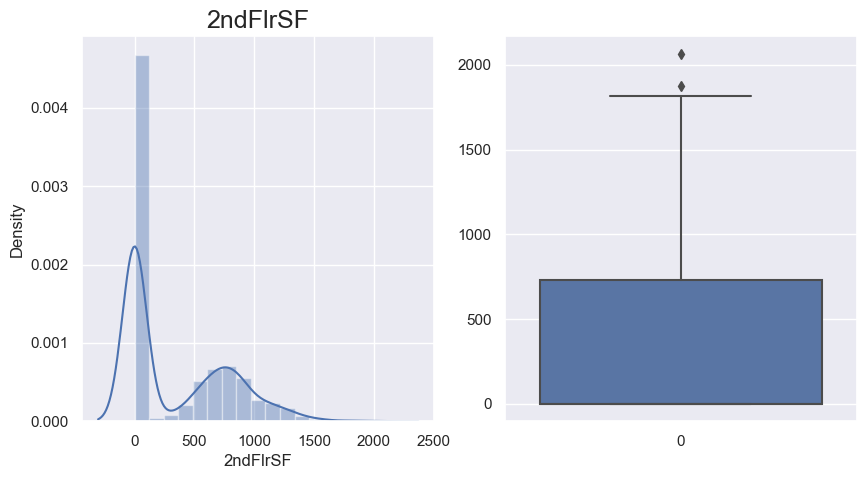

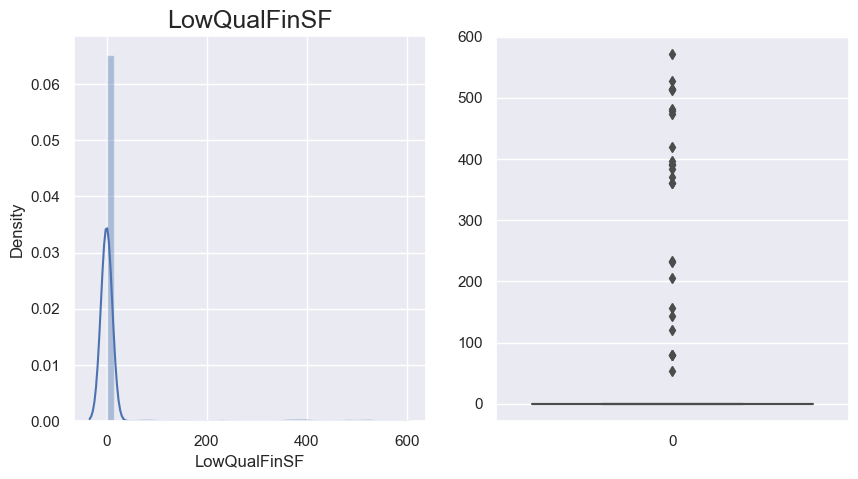

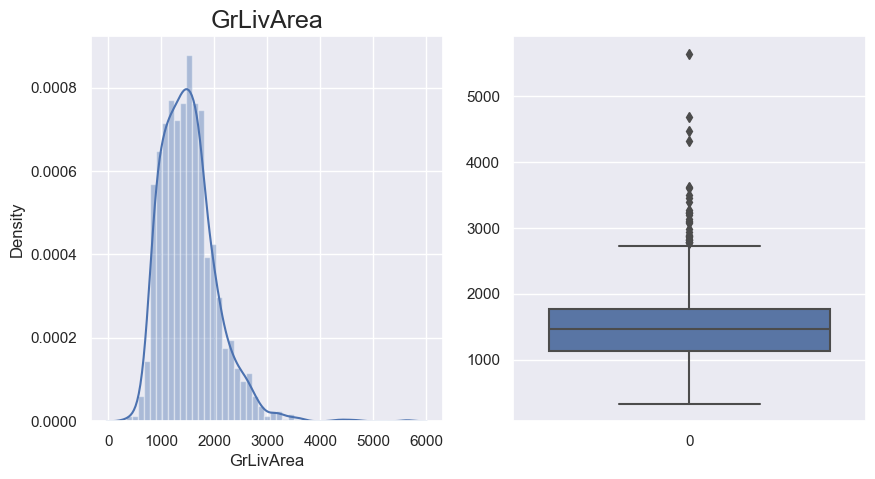

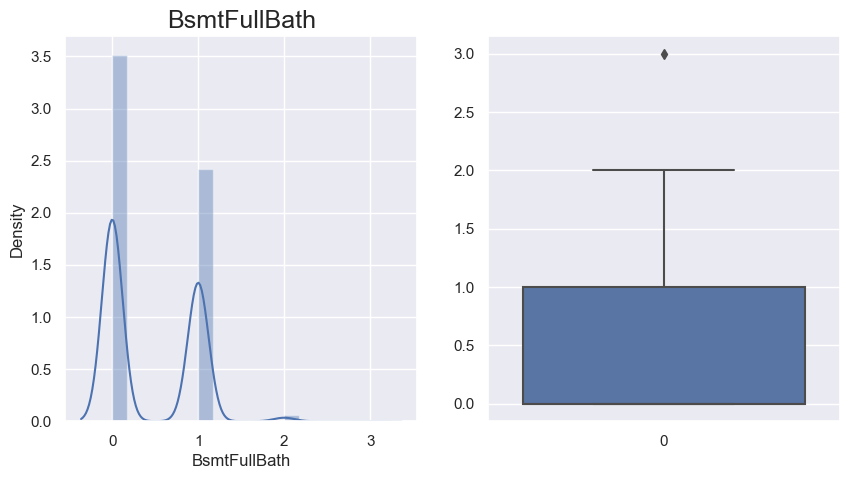

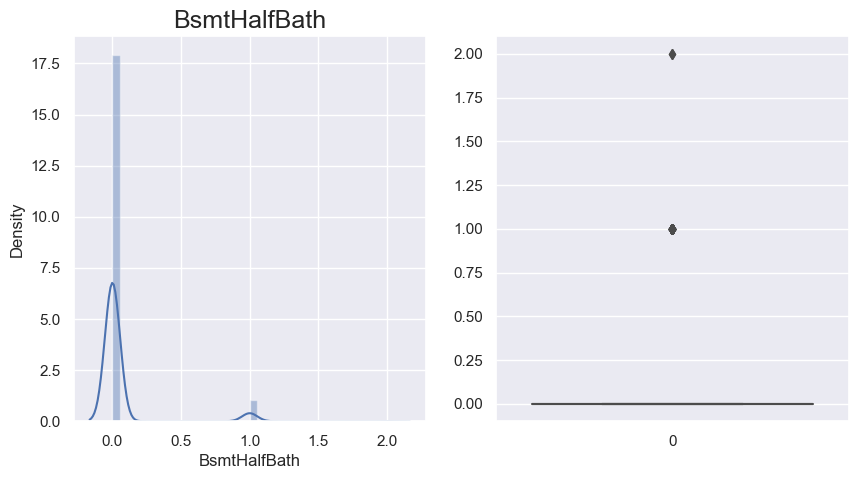

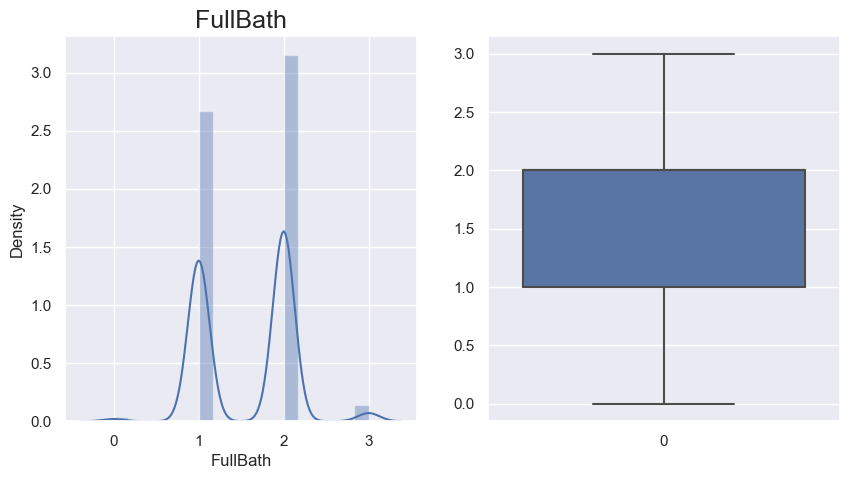

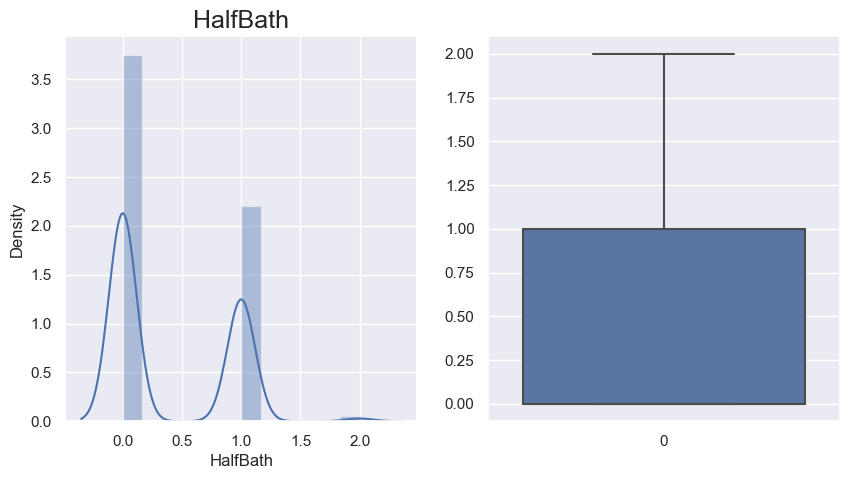

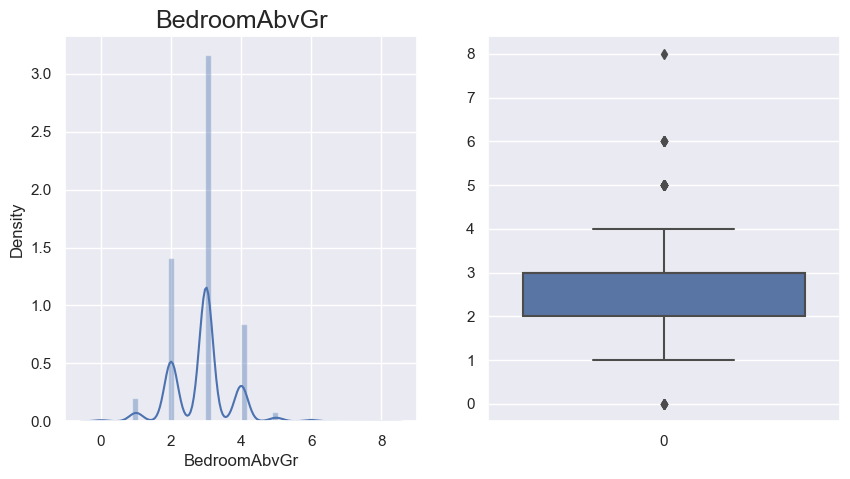

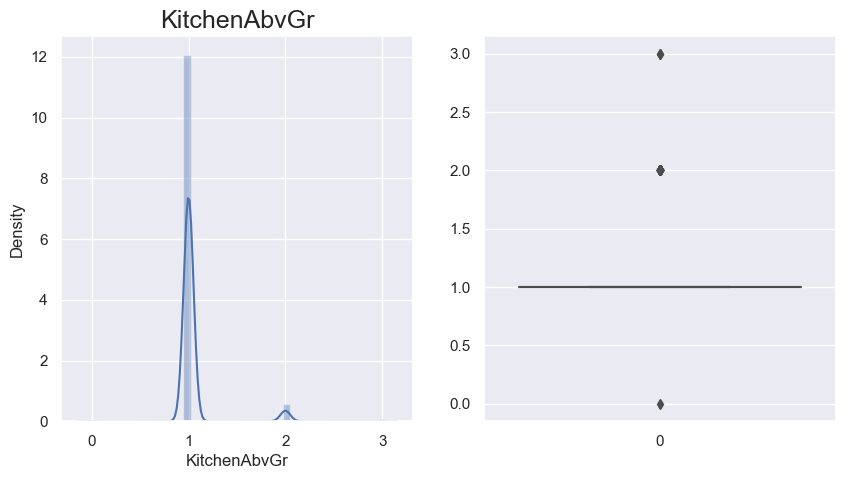

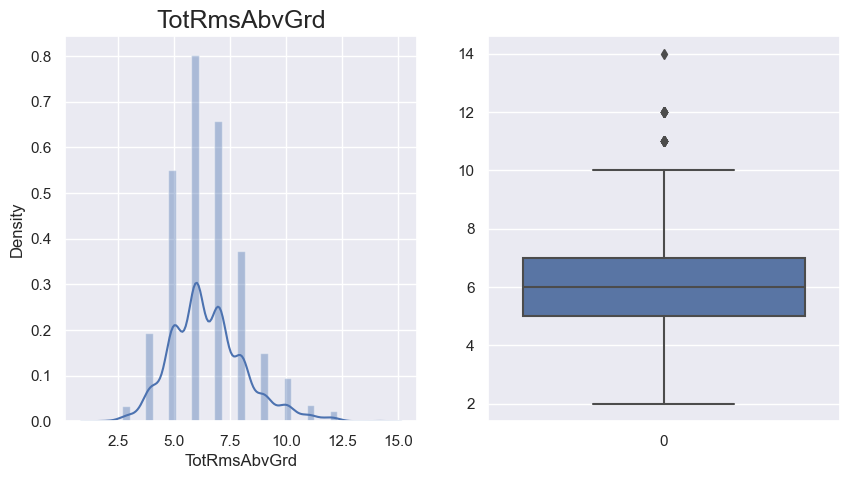

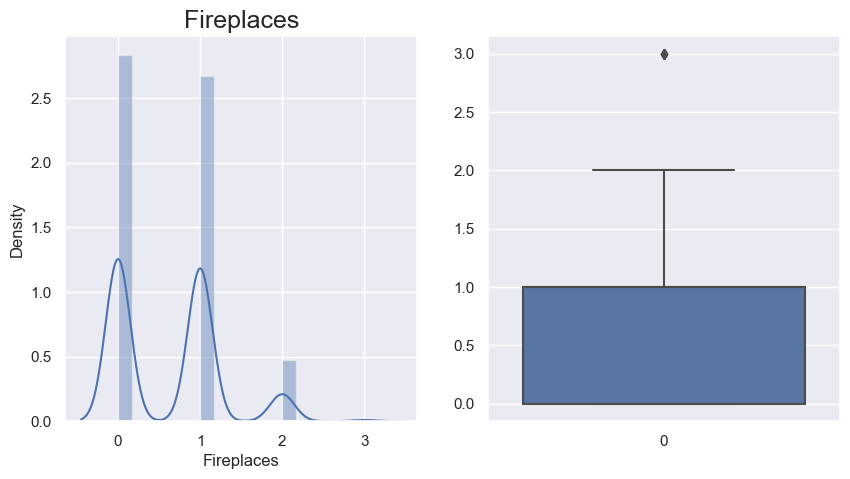

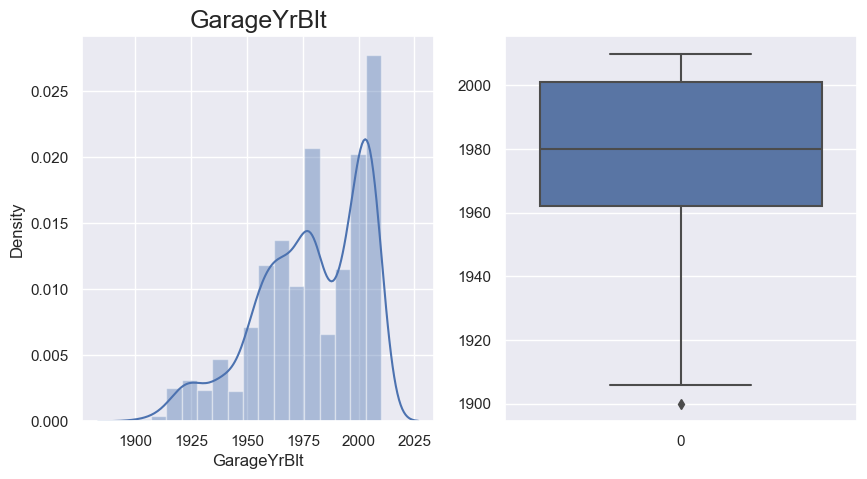

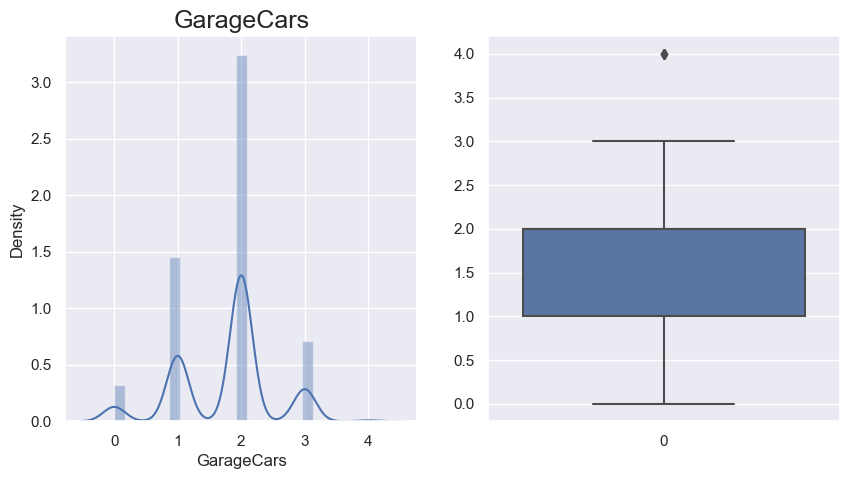

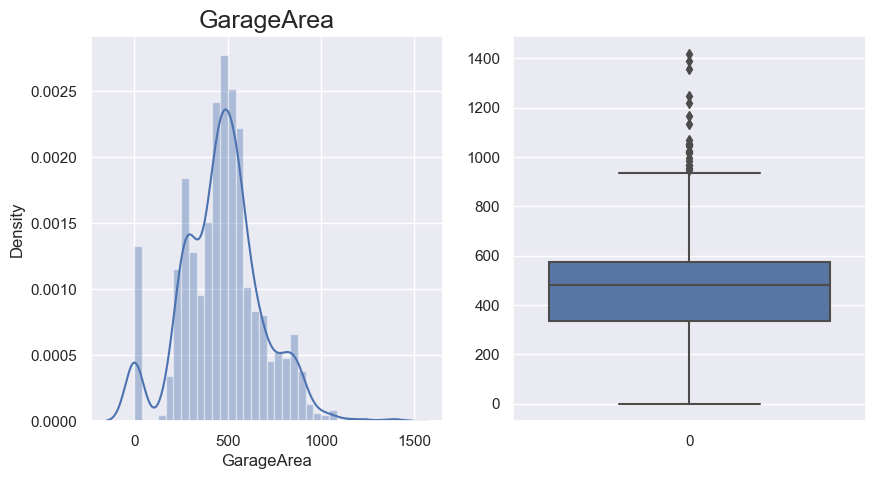

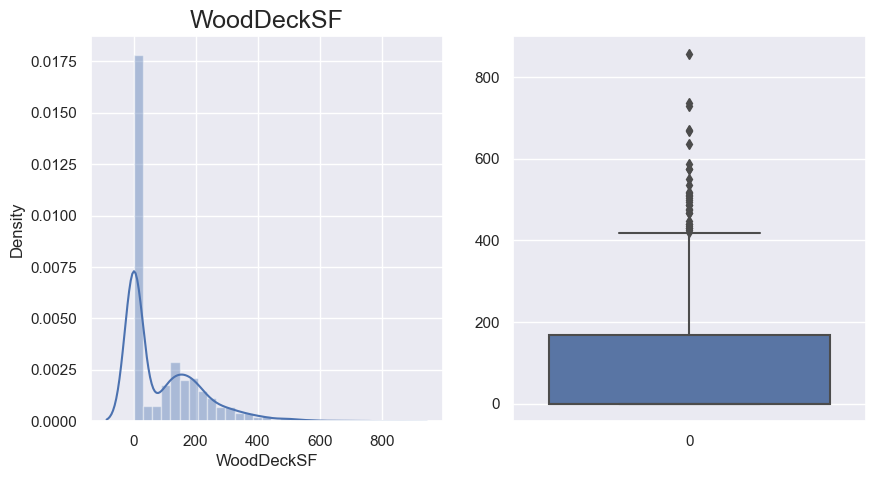

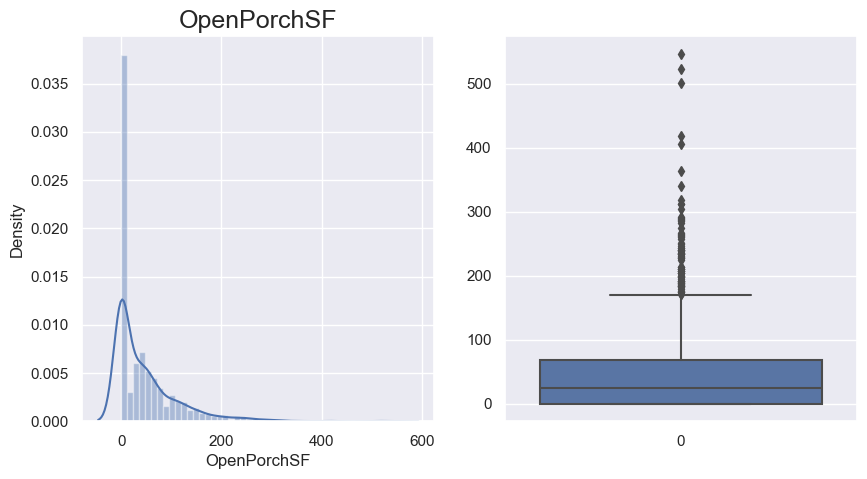

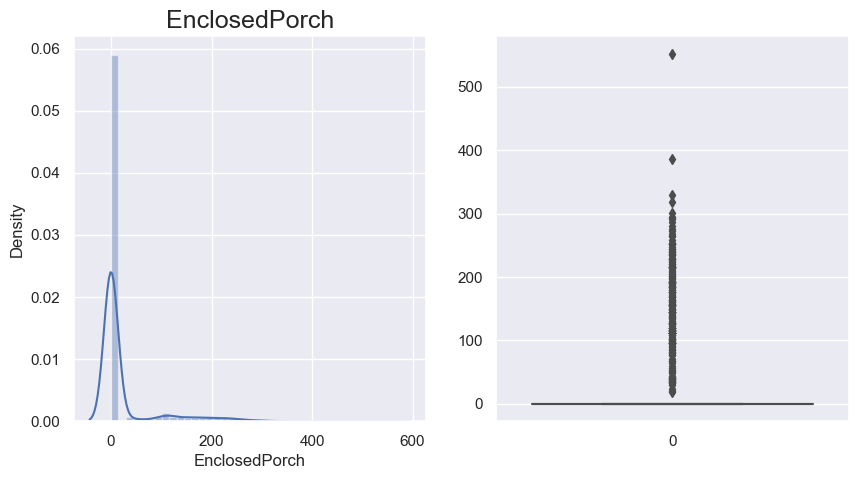

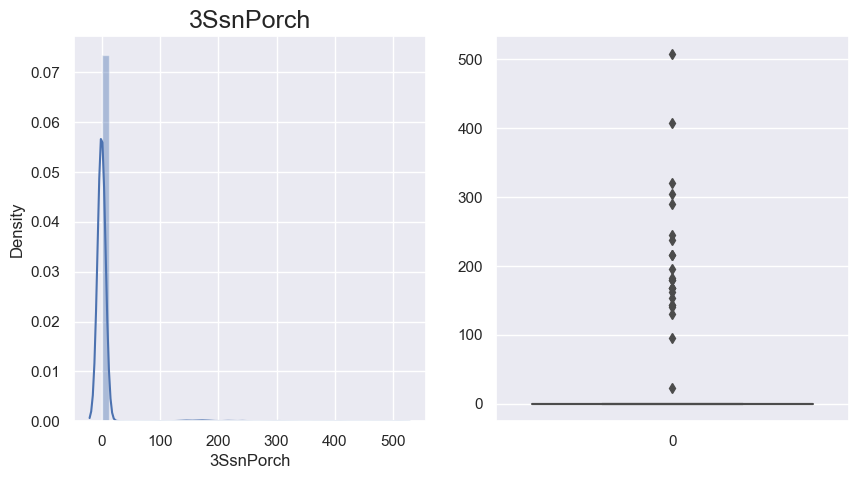

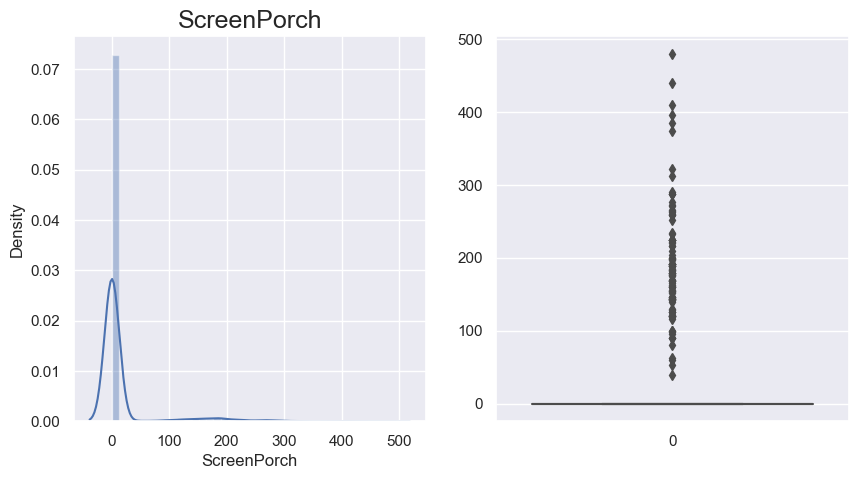

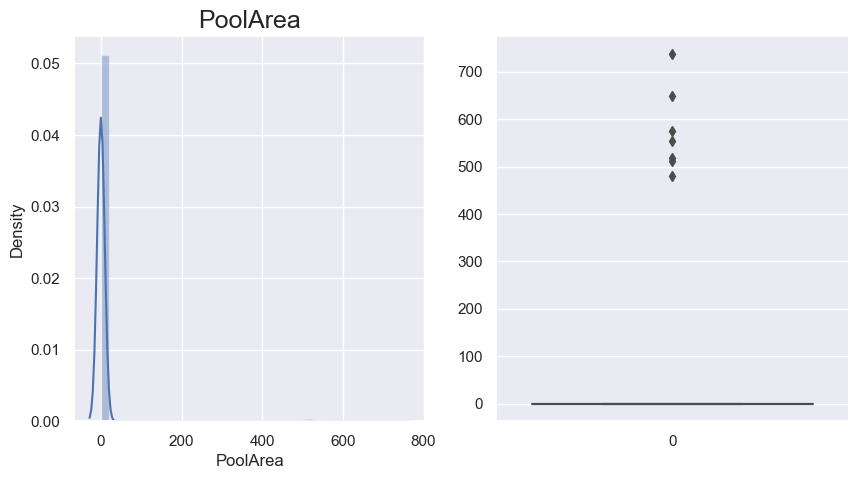

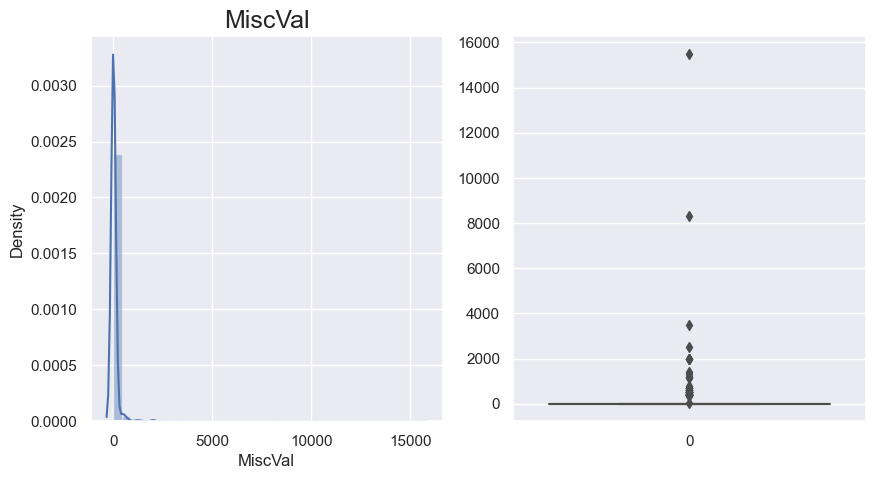

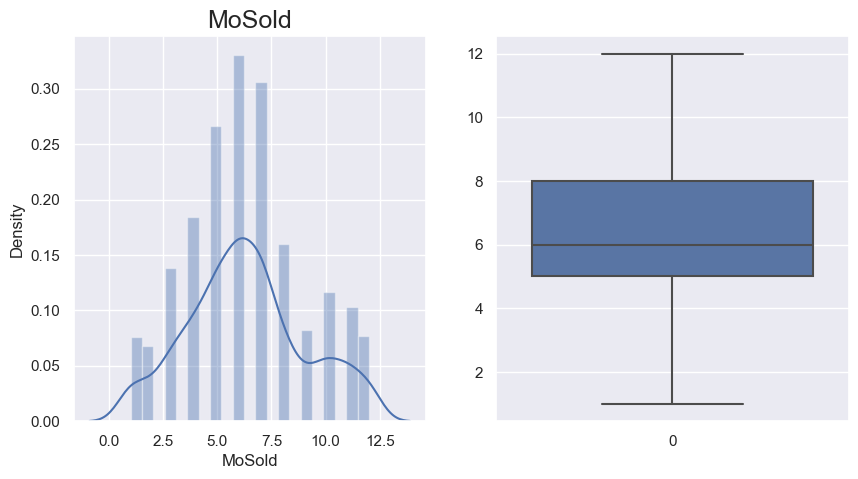

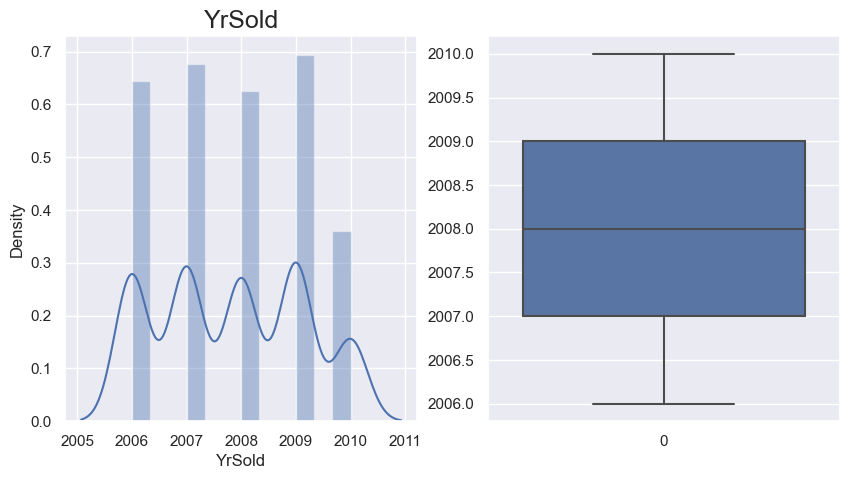

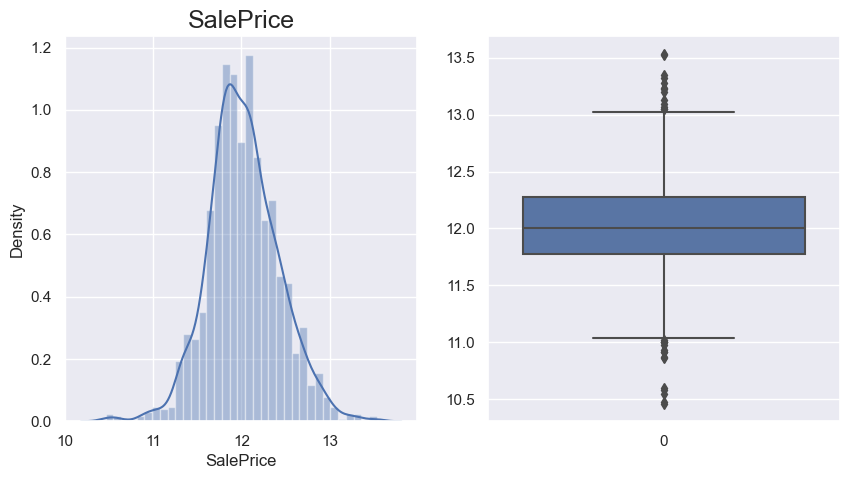

In [629]:
## View the distribution of all numeric variables using histograms and boxplots

for col in df_numeric.columns:
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df_numeric[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_numeric[col])
    plt.show() 

Ovservations from above Univariate Analysis on the Numeric Columns
- Many of the numerical columns are having non-normal distribution.
- Most of the columns have outliers. So, we will require to do Outlier treatment.

Below mentioned columns are binary categorical variables and should not be part of numeric dataframe and should be added as part of categorical dataframe
- 'BsmtFullBath'
- 'BsmtHalfBath'
- 'FullBath'
- 'HalfBath' 

In [630]:
bin_col = ['BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath']
for col in bin_col: 
    print(df_numeric[col].value_counts())

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64
0    913
1    535
2     12
Name: HalfBath, dtype: int64


Droping the binary value columns

In [631]:
df_numeric.drop(bin_col,axis=1,inplace=True)

Adding the Binaray value columns as categorical dataframe and converting the coulmns as object data type

In [632]:
df_category[bin_col]=clean_data[bin_col].astype('object')

### Univariate Analysis on Categorical Columns

In [633]:
## View the unique values of all Categorical columns
for col in df_category.columns:
    print(col)
    print(df_category[col].unique(), '\n')

MSSubClass
['2-STORY 1946 & NEWER' '1-STORY 1946 & NEWER ALL STYLES'
 '2-STORY 1945 & OLDER' '1-1/2 STORY FINISHED ALL AGES'
 '2 FAMILY CONVERSION - ALL STYLES AND AGES'
 'DUPLEX - ALL STYLES AND AGES'
 '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
 '1-STORY 1945 & OLDER' 'SPLIT FOYER' 'SPLIT OR MULTI-LEVEL'
 '2-STORY PUD - 1946 & NEWER' '2-1/2 STORY ALL AGES'
 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'
 '1-STORY W/FINISHED ATTIC ALL AGES'] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' '

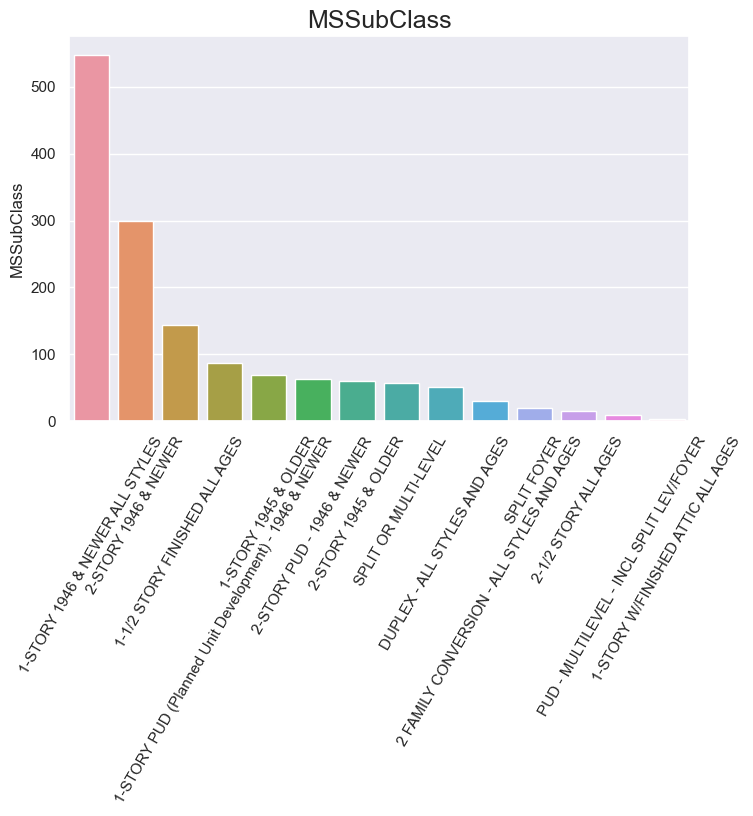

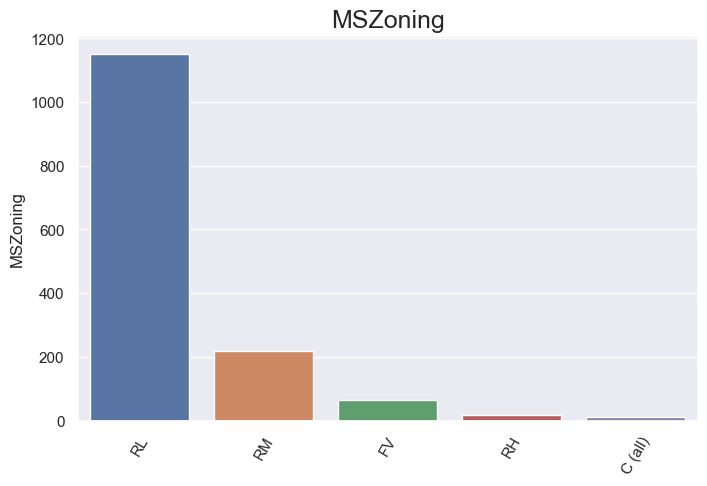

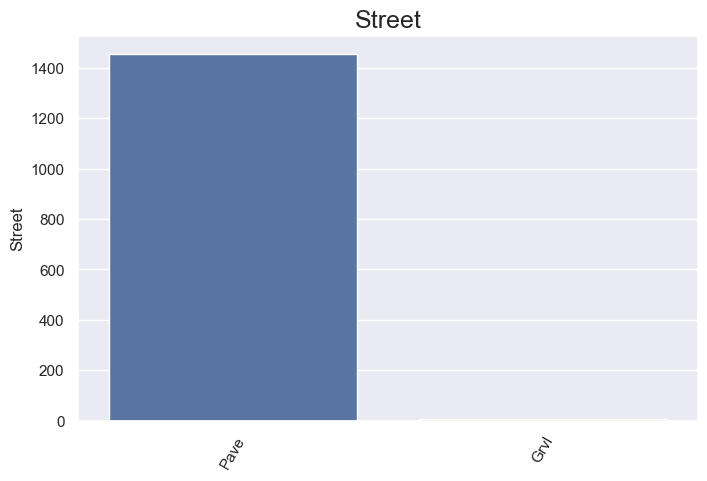

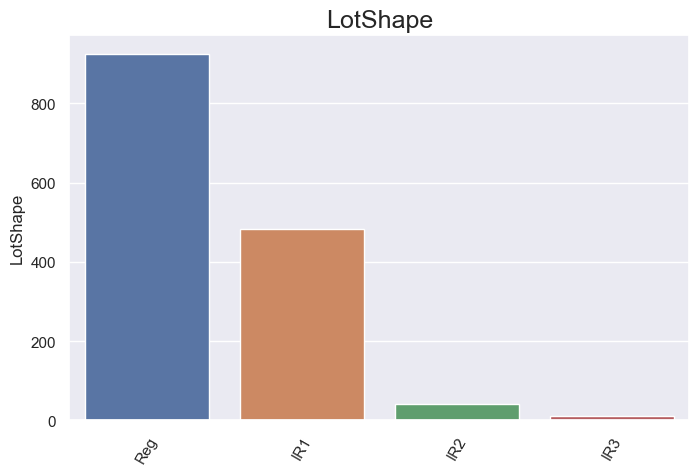

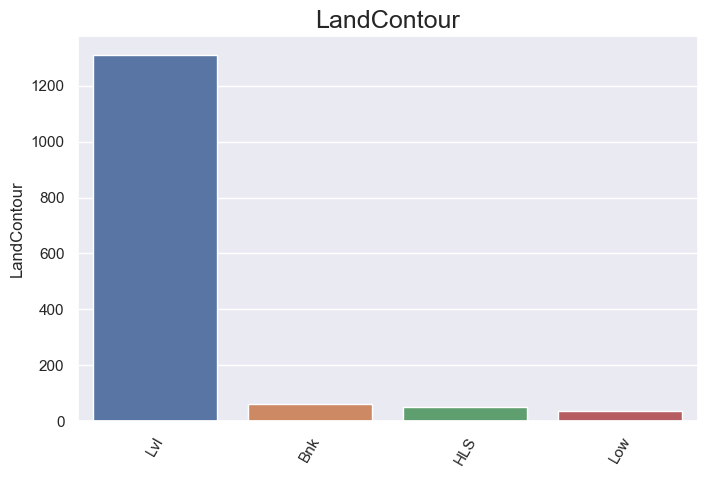

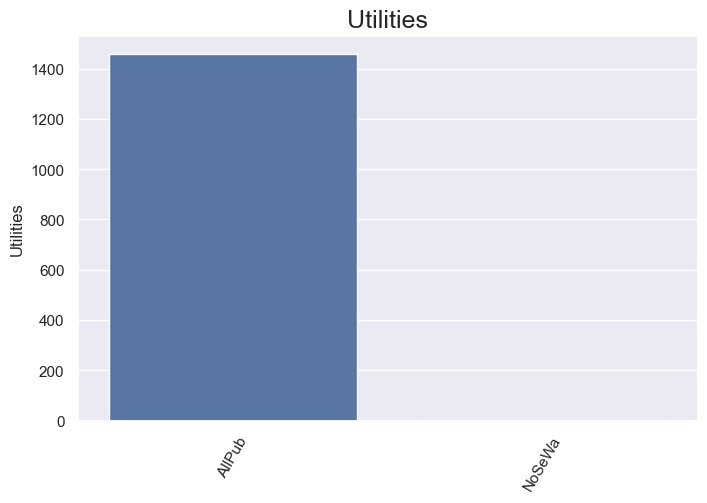

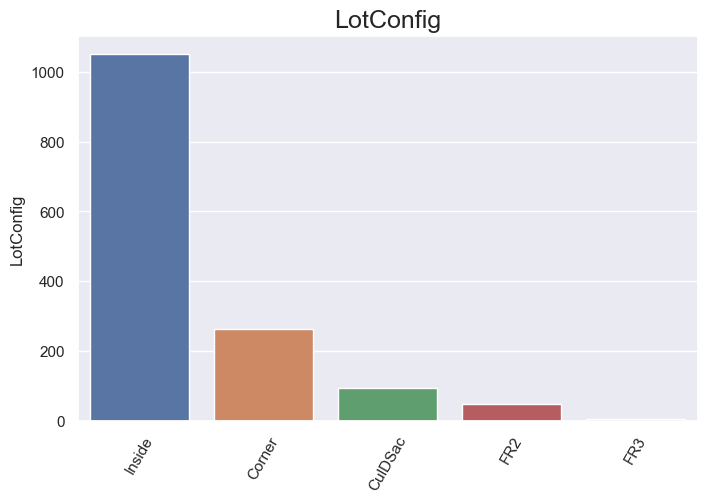

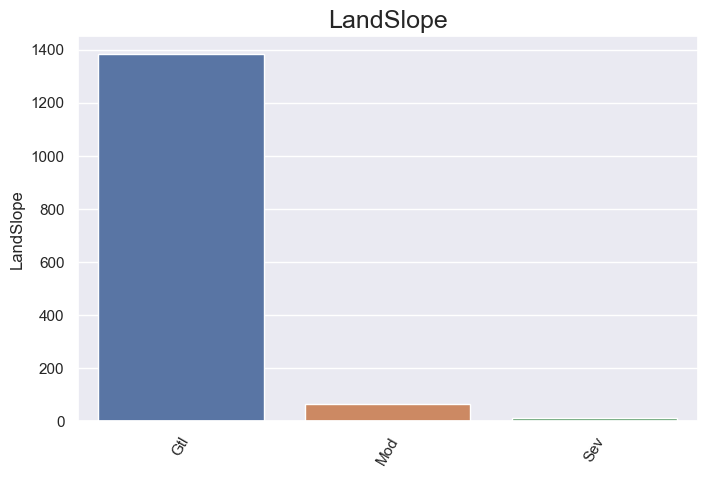

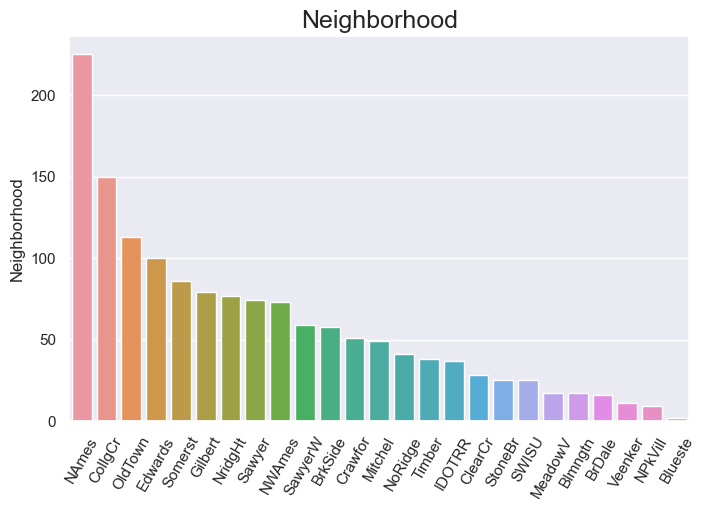

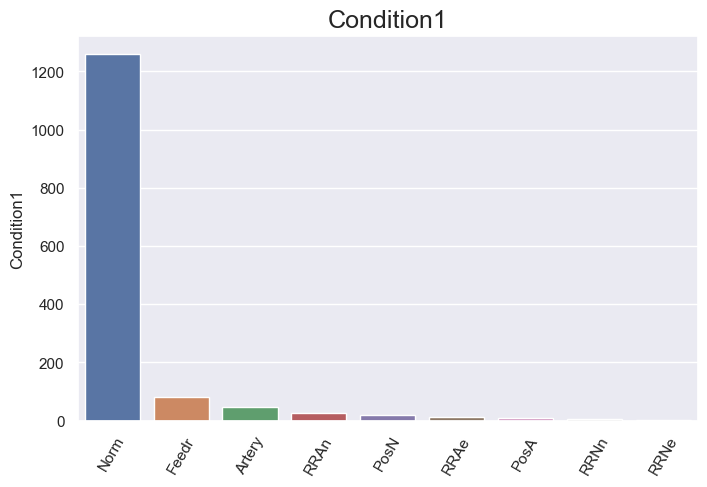

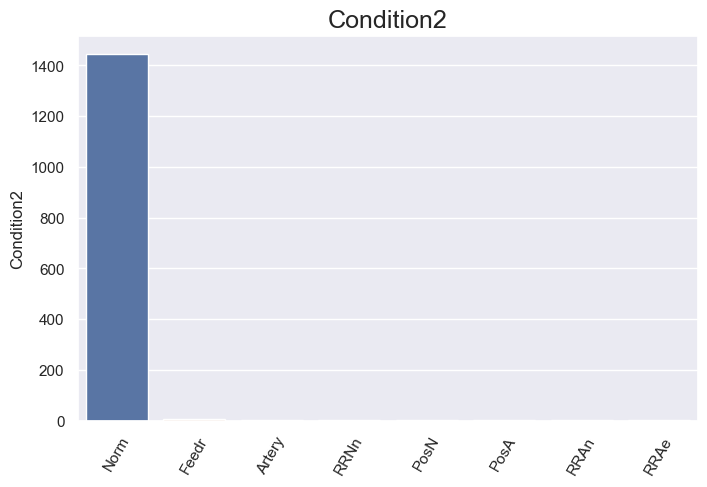

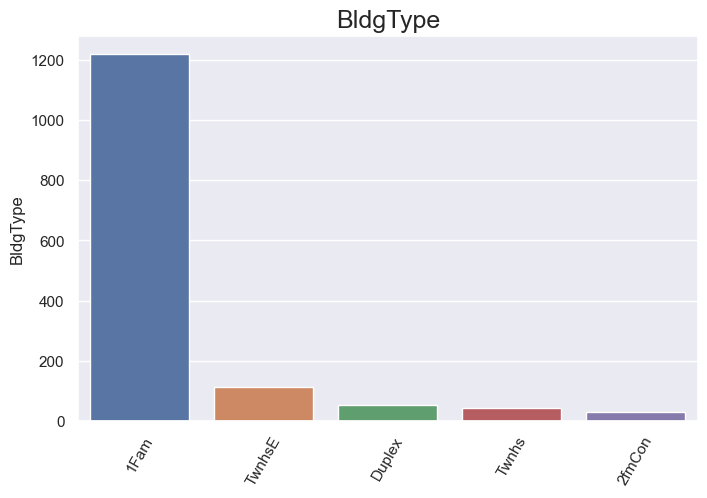

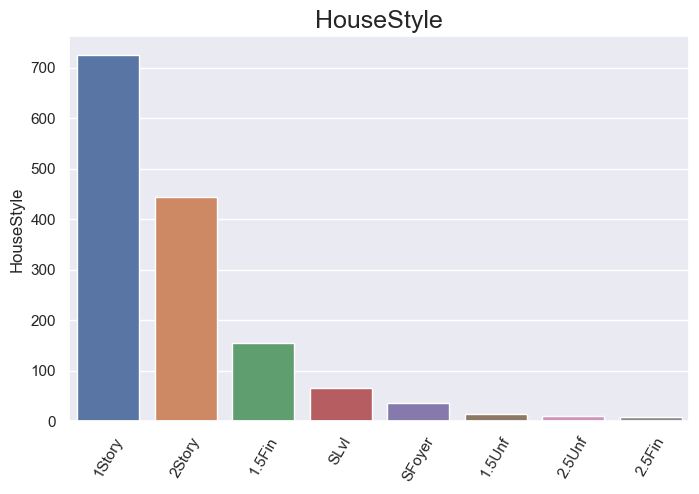

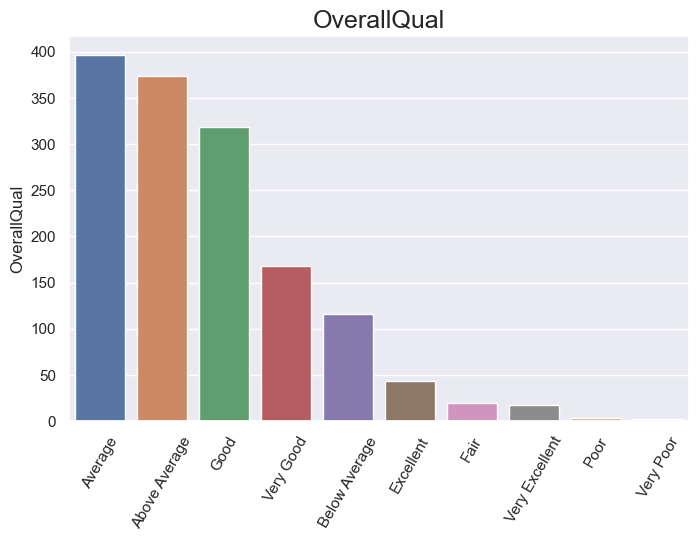

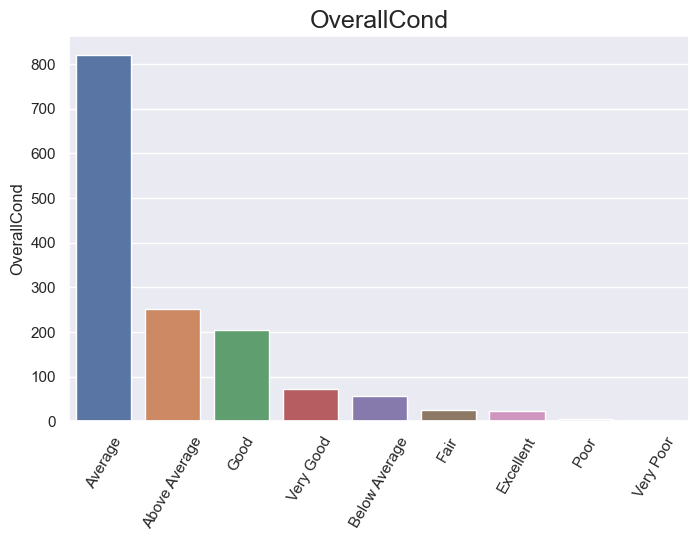

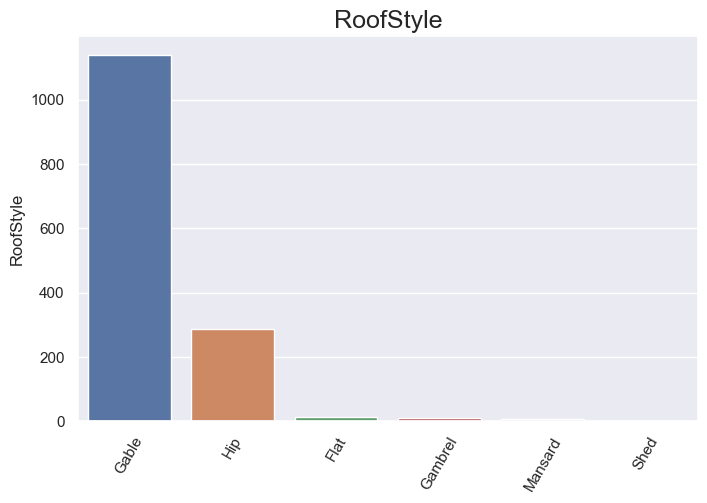

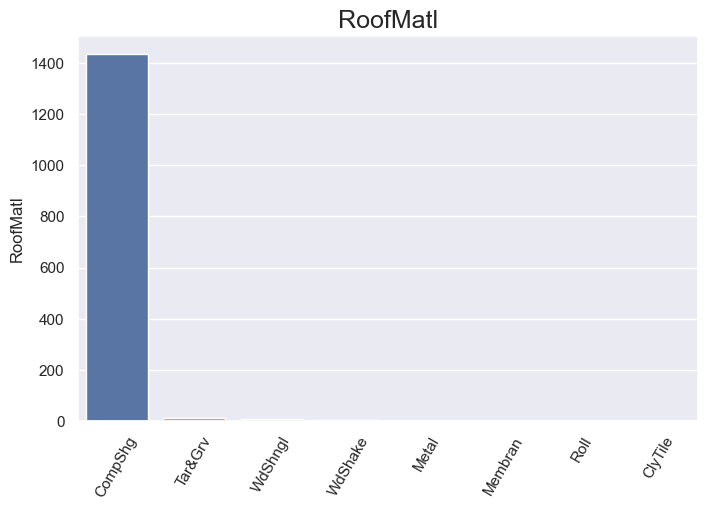

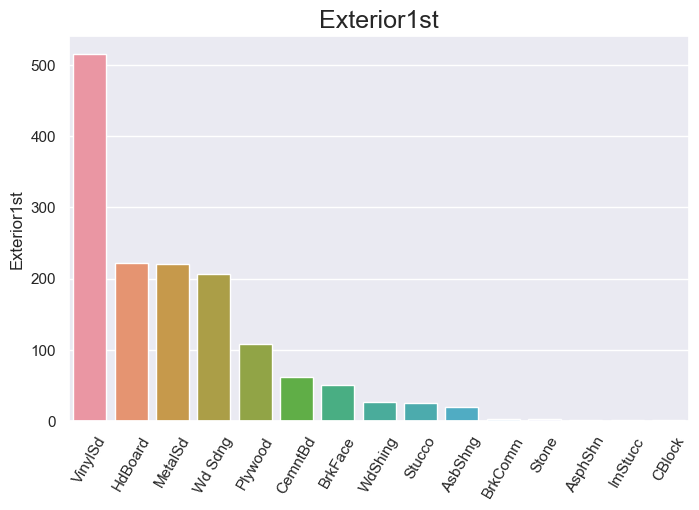

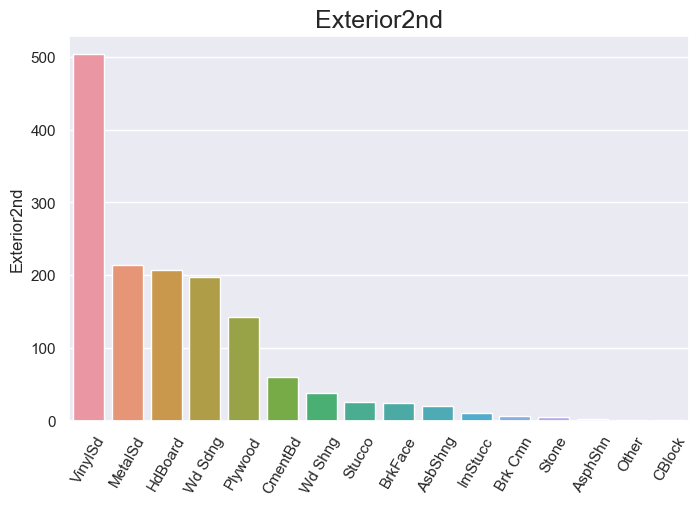

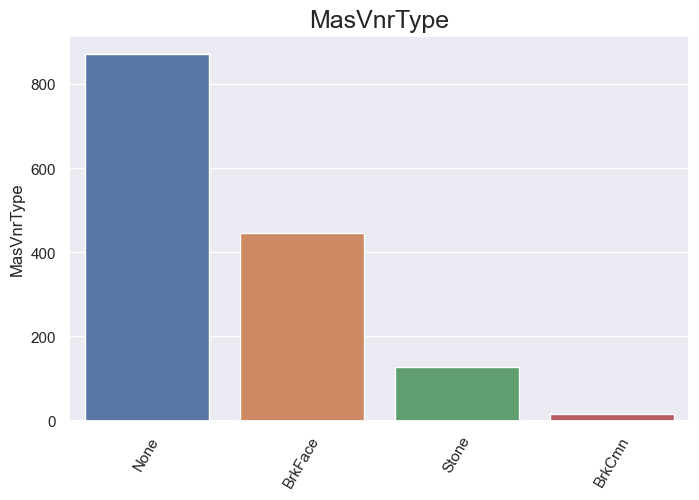

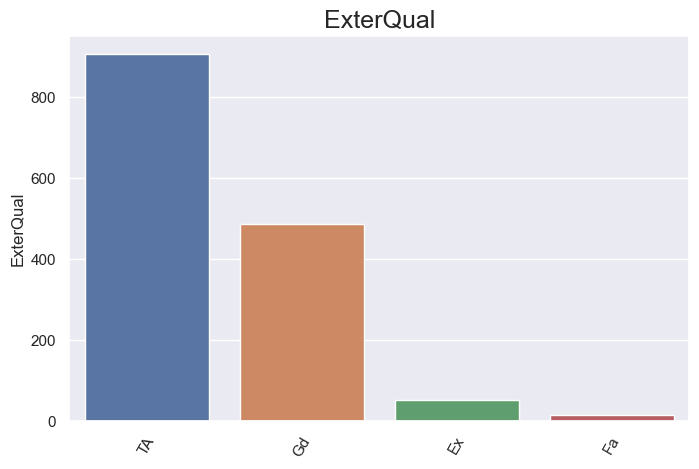

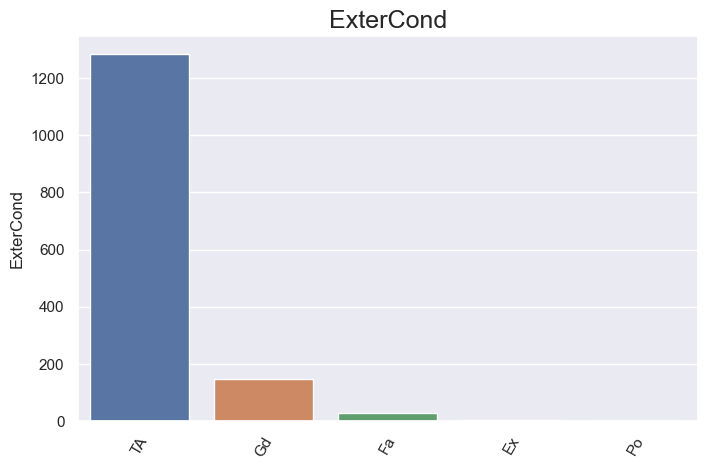

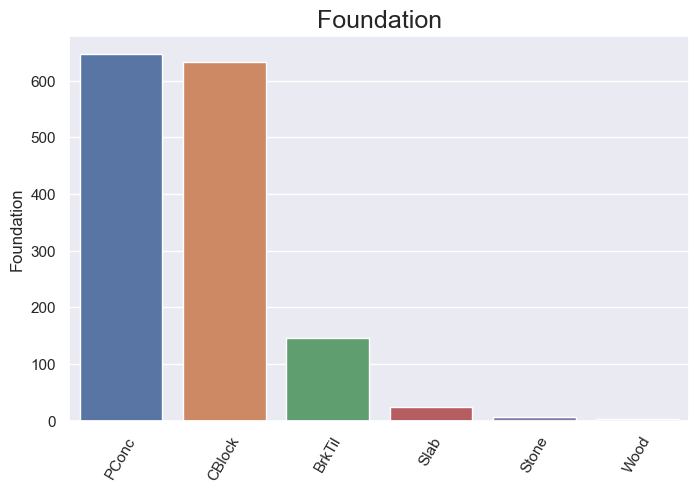

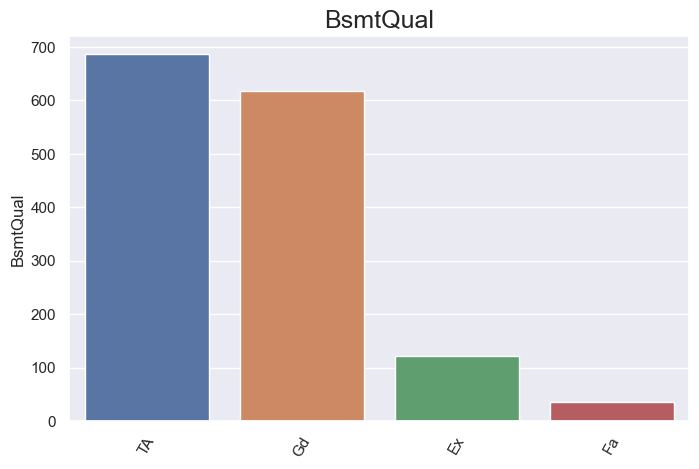

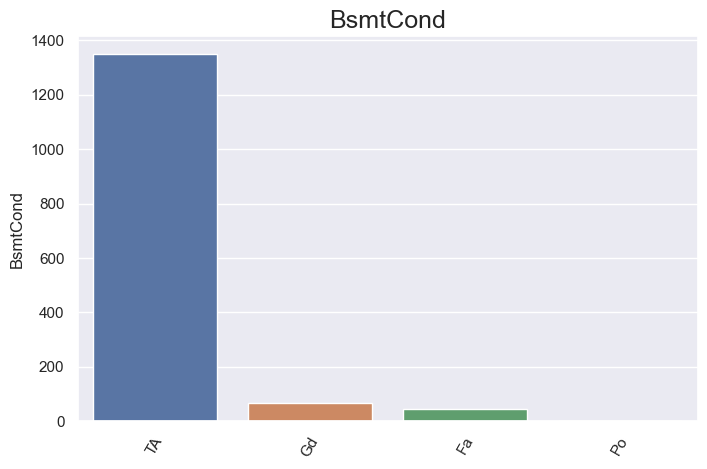

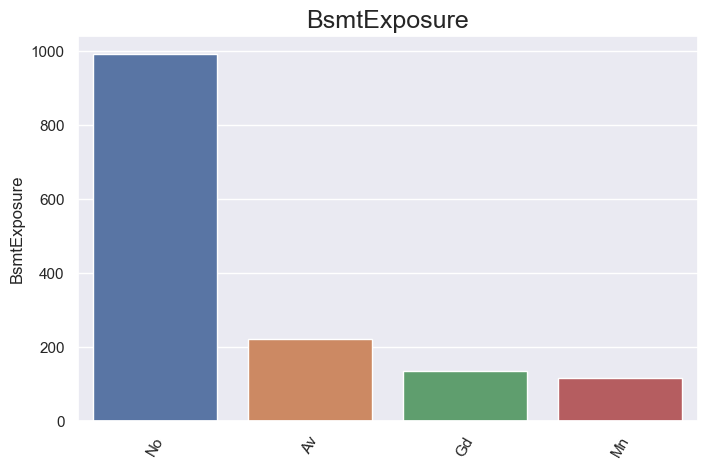

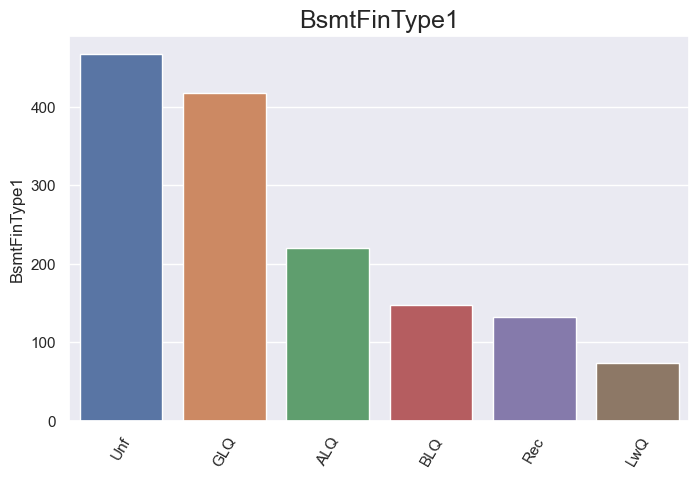

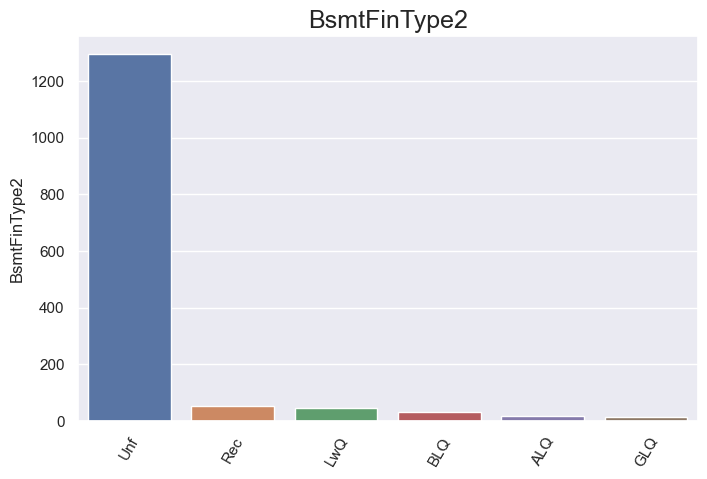

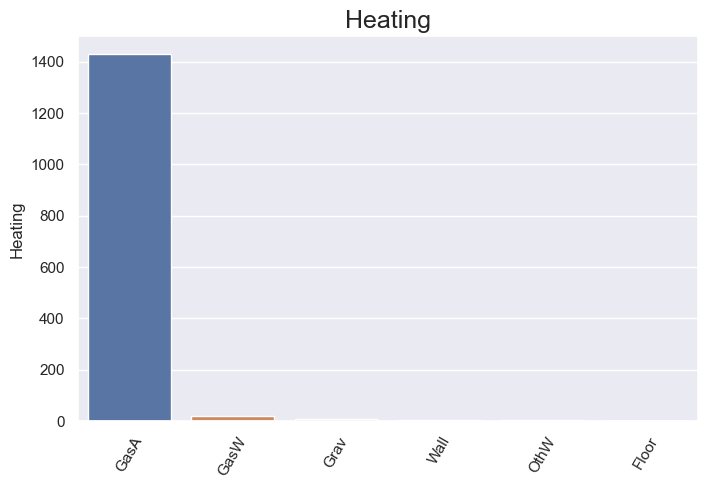

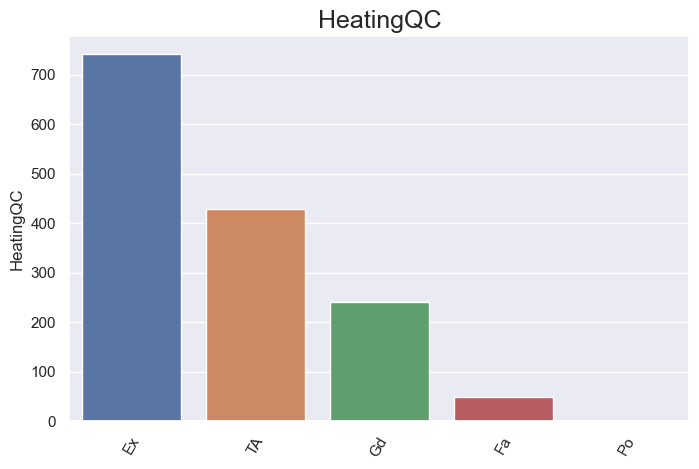

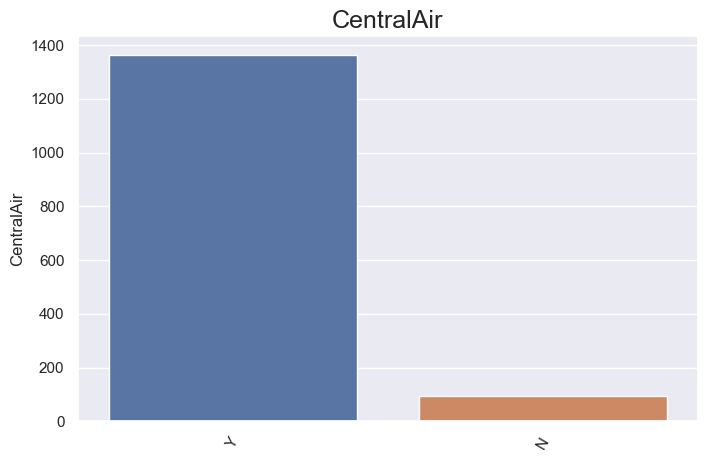

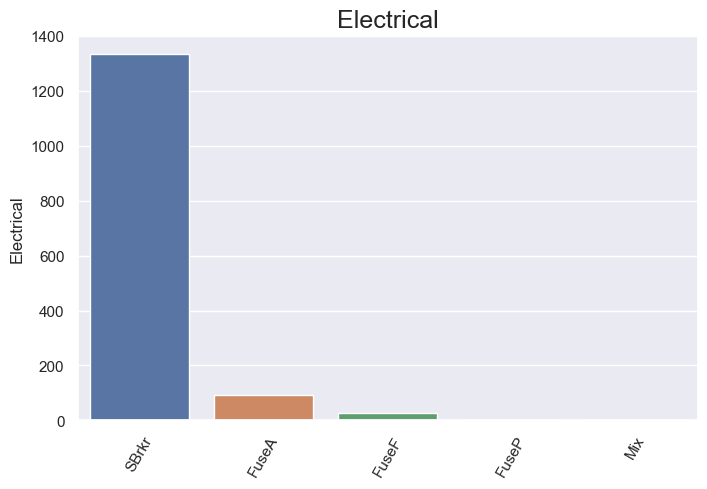

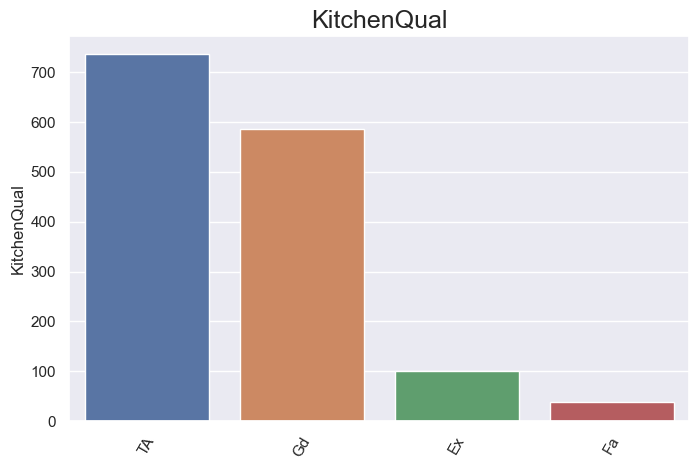

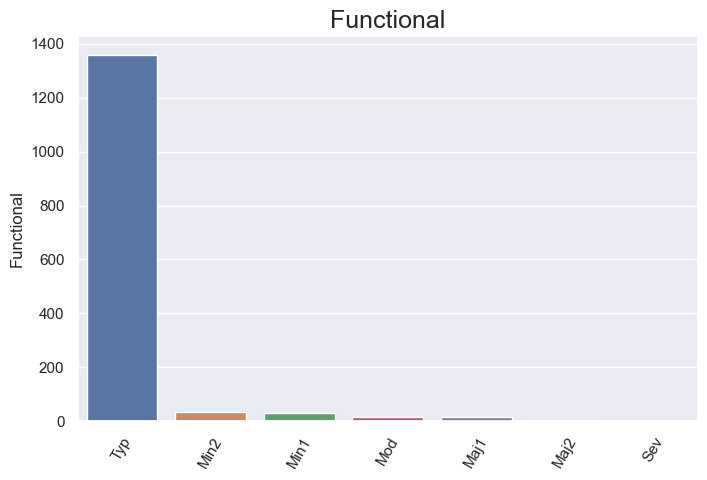

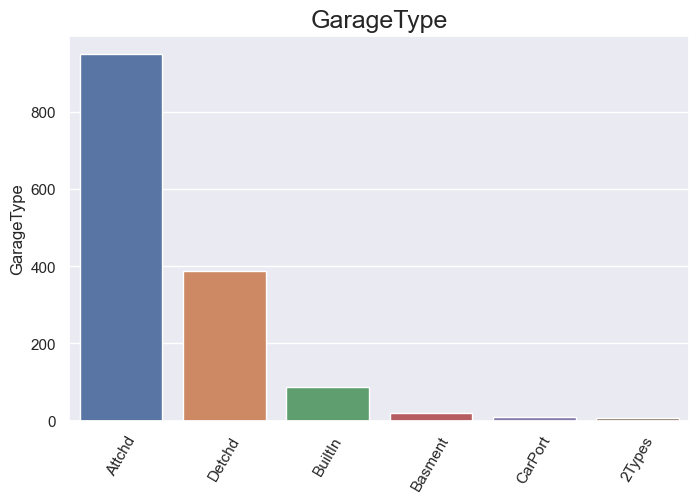

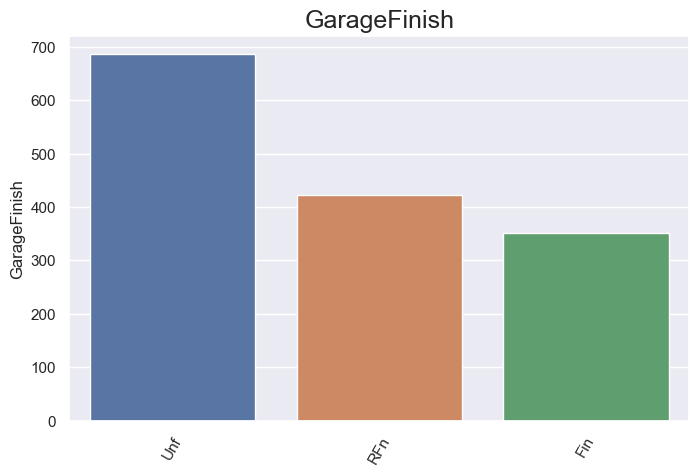

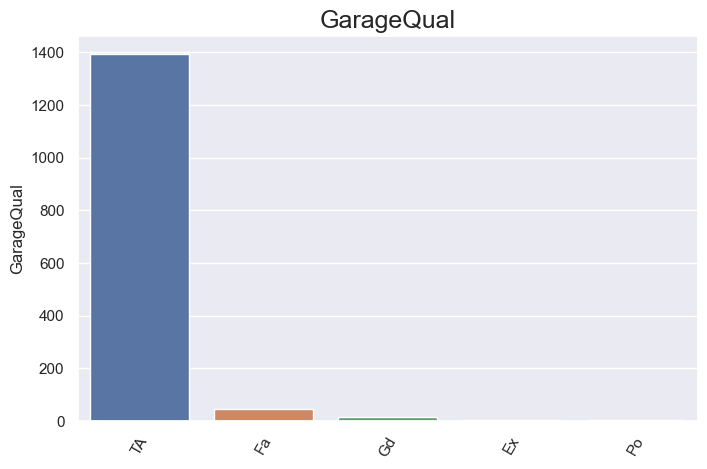

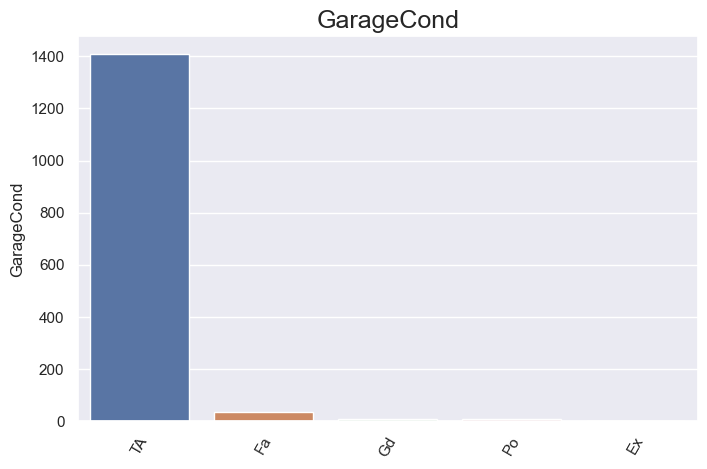

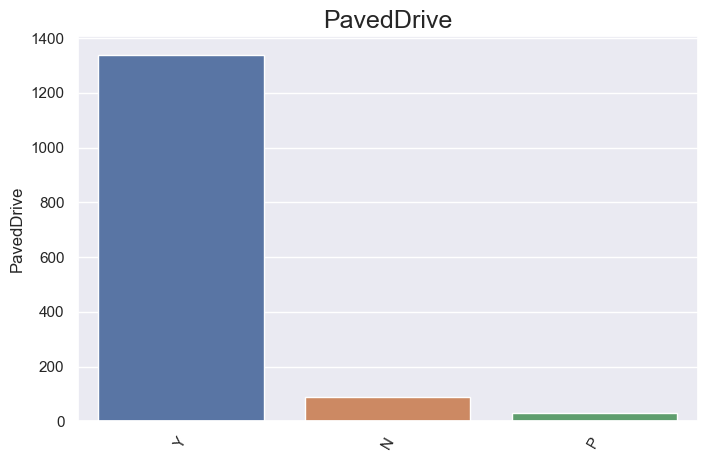

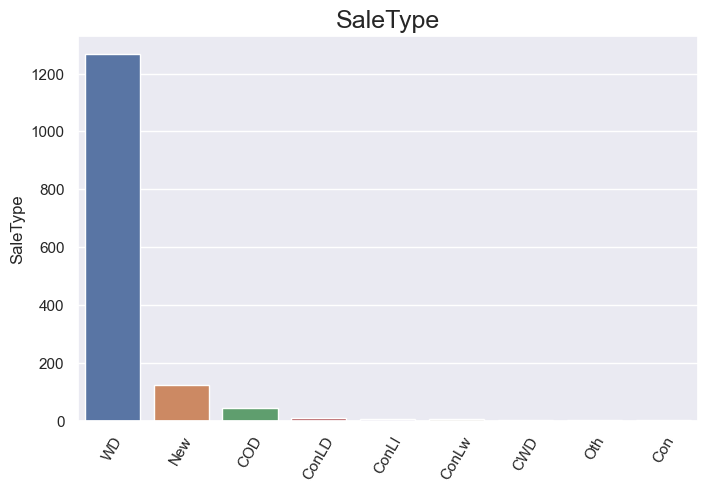

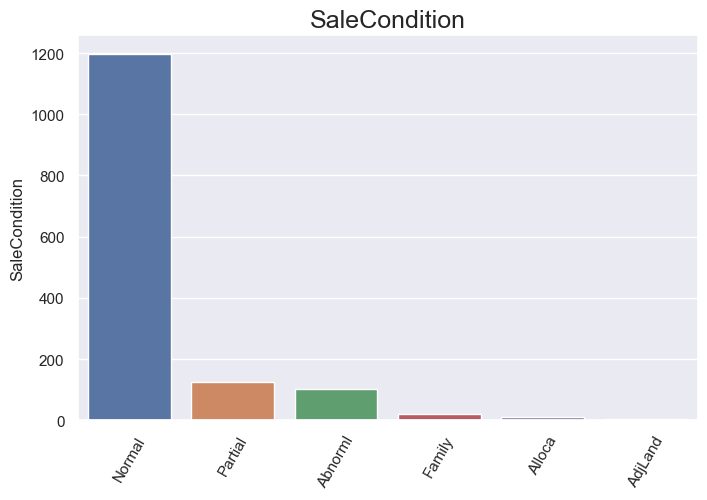

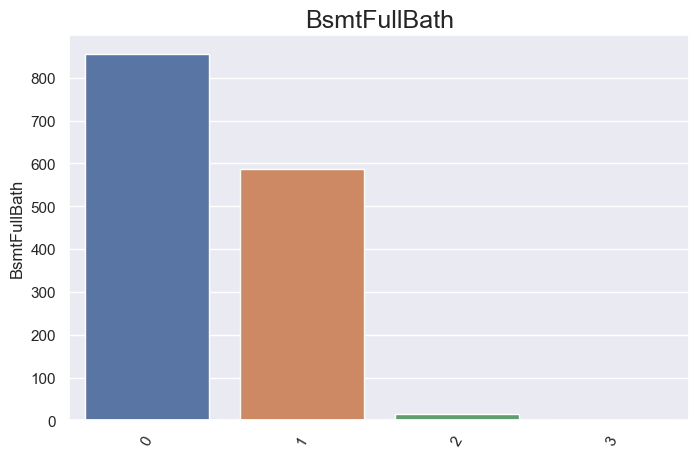

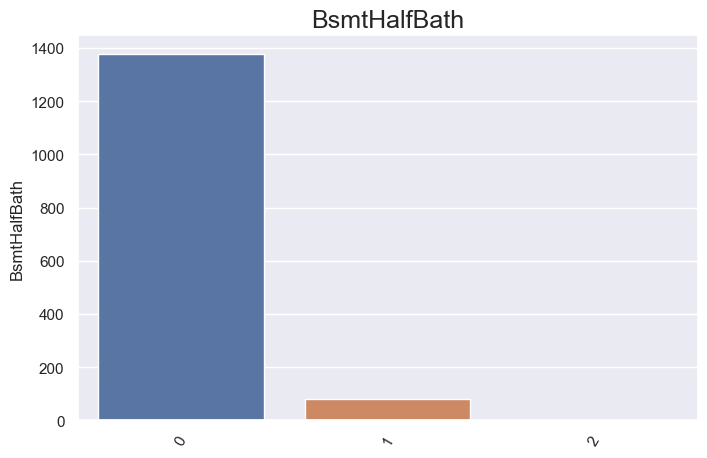

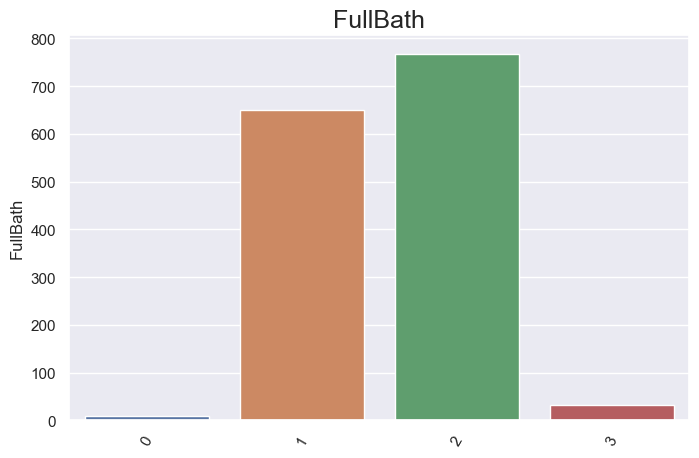

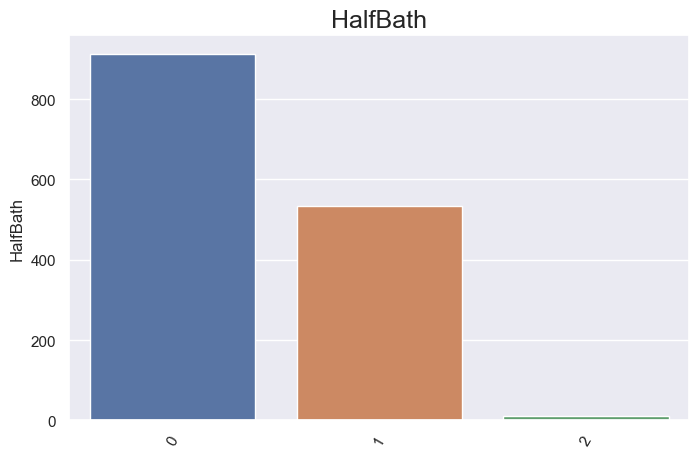

In [634]:
## Visualizing the levels of categorical columns using bar plots
for col in df_category.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(x = df_category[col].value_counts().index, y = df_category[col].value_counts())
    plt.xticks(rotation=60)
    plt.show()

## Bivariate Analysis

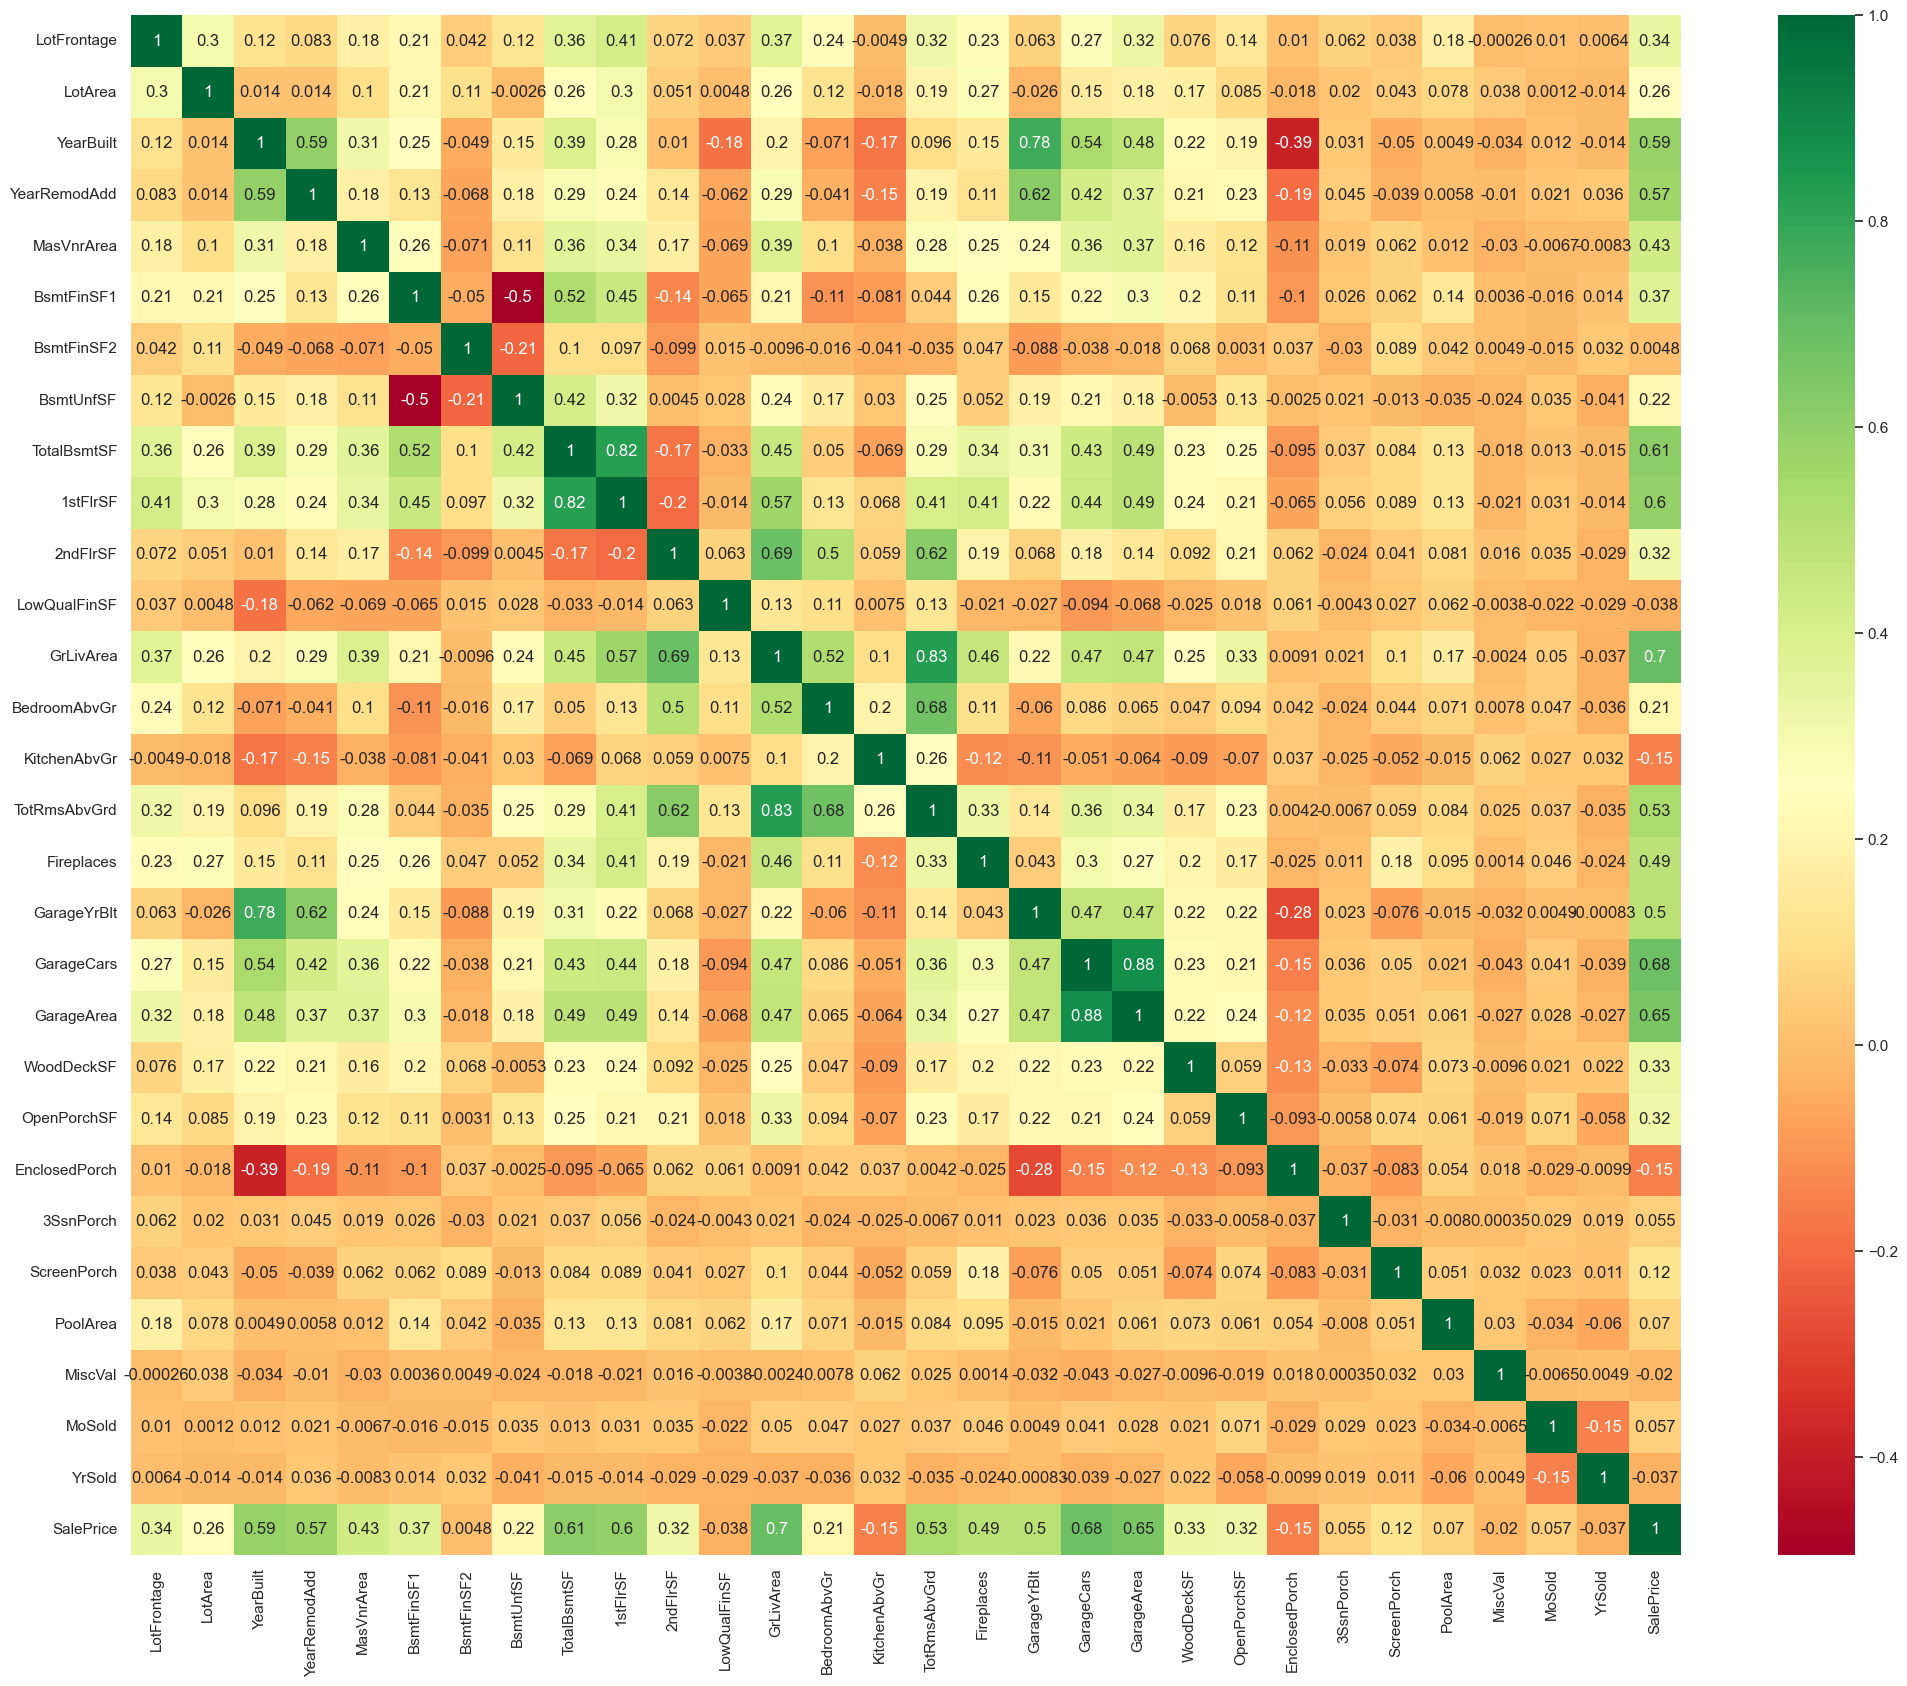

In [635]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(df_numeric.corr(), annot=True, cmap='RdYlGn');

Observations from the above heatmap
- Many columns are highly correlated with each other
- Target variable SalePrice is highly correlated with BsmtUnfSF,TotRmsAbvGrd , GarageCars and GarageYrdBlt.


Dropping GarageCars,BsmtUnfSF,TotRmsAbvGrd and GarageYrBlt columns as these are highly corelated not contributing to 'Sales price"

In [636]:
drop_col = ['GarageCars','BsmtUnfSF','TotRmsAbvGrd','GarageYrBlt']
df_numeric.drop(drop_col,axis=1,inplace=True)

# Step 4 : Feature Engineering

### Add a new column called property age.

In [637]:
df_numeric['Age'] = df_numeric['YrSold'] - df_numeric['YearBuilt']
df_numeric.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)
df_numeric.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0     8450          2003       196.0         706           0   
1         80.0     9600          1976         0.0         978           0   
2         68.0    11250          2002       162.0         486           0   
3         60.0     9550          1970         0.0         216           0   
4         84.0    14260          2000       350.0         655           0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BedroomAbvGr  \
0          856       856       854             0       1710             3   
1         1262      1262         0             0       1262             3   
2          920       920       866             0       1786             3   
3          756       961       756             0       1717             3   
4         1145      1145      1053             0       2198             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0              0          0            0         0        0       2   
1              0          0            0         0        0       5   
2              0          0            0         0        0       9   
3            272          0            0         0        0       2   
4              0          0            0         0        0      12   

   SalePrice  Age  
0  12.247694    5  
1  12.109011   31  
2  12.317167    7  
3  11.849398   91  
4  12.429216    8

### Add Dummy Variables

In [638]:
df_category_encoded = pd.get_dummies(df_category, drop_first=True)
df_category_encoded.head()

MSSubClass_1-STORY 1945 & OLDER  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                                 0   
1                                                                 0   
2                                                                 0   
3                                                                 0   
4                                                                 0   

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                     0   
1                                                     0   
2                                                     0   
3                                                     0   
4                                                     0   

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                                1                                      0   
1                                0                                      0   
2                                1                                      0   
3                                0                                      0   
4                                1                                      0   

   MSSubClass_DUPLEX - ALL STYLES AND AGES  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  MSSubClass_SPLIT FOYER  \
0                                                   0                       0   
1                                                   0                       0   
2                                                   0                       0   
3                                                   0                       0   
4                                                   0                       0   

   MSSubClass_SPLIT OR MULTI-LEVEL  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0                                0            0            0            1   
1                                0            0            0            1   
2                                0            0            0            1   
3                                0            0            0            1   
4                                0            0            0            1   

   MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0            0            1             0             0             1   
1            0            1             0             0             1   
2            0            1             0             

In [639]:
## Check the dimensions
df_category_encoded.shape

(1460, 236)

# Step 5: Removing Outlier

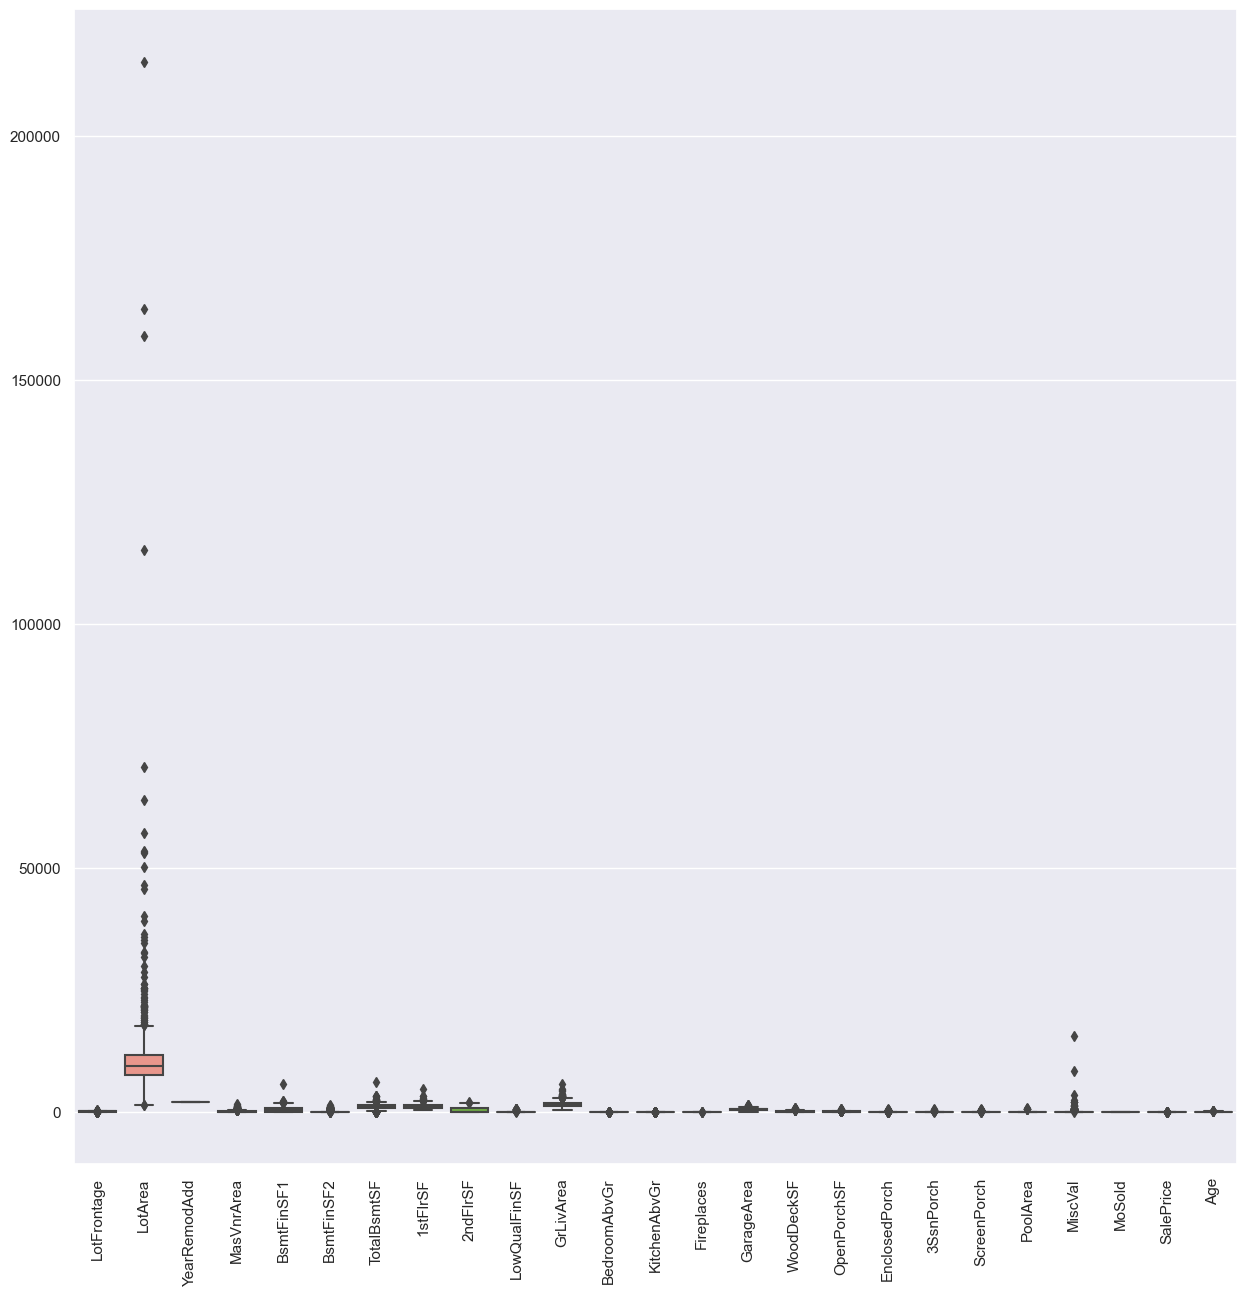

In [640]:
## Check the outliers in numerical columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_numeric);

Capping outliers to 5% at lower bound and 95% at upper bound. Remove rest of the data

In [641]:
for col in df_numeric.columns:
    df_numeric[col][df_numeric[col] <= df_numeric[col].quantile(0.05)] = df_numeric[col].quantile(0.05)
    df_numeric[col][df_numeric[col] >= df_numeric[col].quantile(0.95)] = df_numeric[col].quantile(0.95)

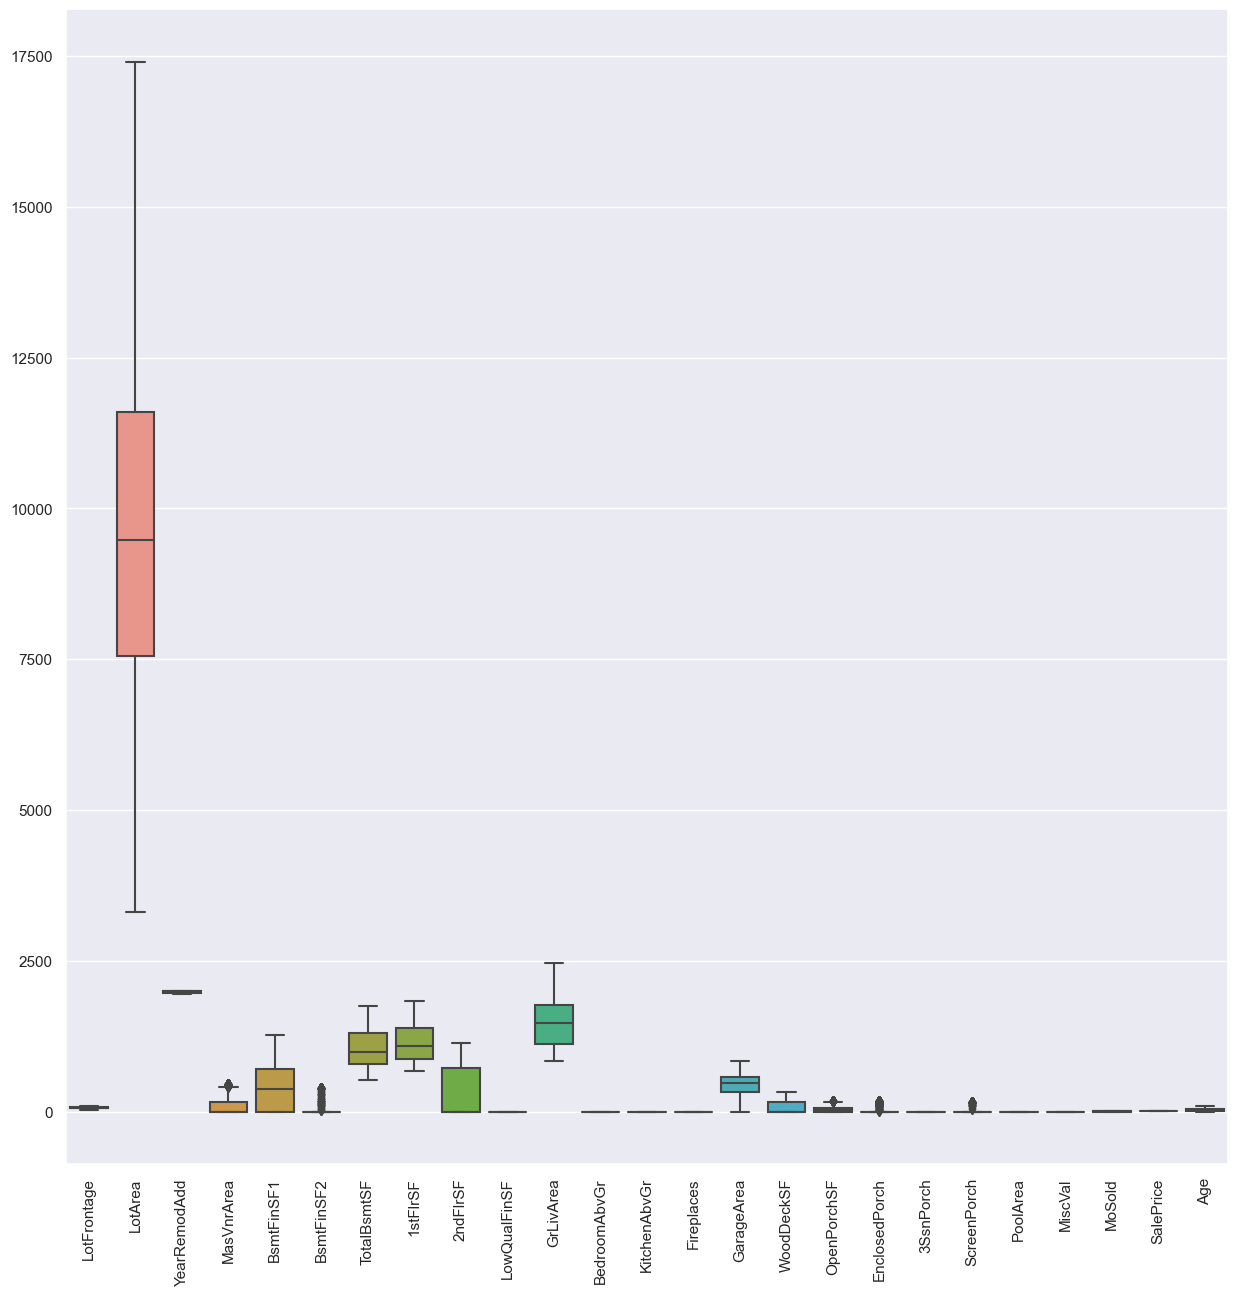

In [642]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_numeric);

So, we have removed outliers from all numerical columns.

### Concatenate the outlier treated numerical columns with dummy variables from the categorical columns

In [643]:
final_df = pd.concat([df_numeric, df_category_encoded], axis=1)
final_df.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0   8450.0          2003       196.0         706         0.0   
1         80.0   9600.0          1976         0.0         978         0.0   
2         68.0  11250.0          2002       162.0         486         0.0   
3         60.0   9550.0          1970         0.0         216         0.0   
4         84.0  14260.0          2000       350.0         655         0.0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BedroomAbvGr  \
0        856.0     856.0     854.0             0     1710.0             3   
1       1262.0    1262.0       0.0             0     1262.0             3   
2        920.0     920.0     866.0             0     1786.0             3   
3        756.0     961.0     756.0             0     1717.0             3   
4       1145.0    1145.0    1053.0             0     2198.0             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0       548.0           0         61.0   
1             1           1       460.0         298          0.0   
2             1           1       608.0           0         42.0   
3             1           1       642.0           0         35.0   
4             1           1       836.0         192         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0           0.00          0            0         0        0       2   
1           0.00          0            0         0        0       5   
2           0.00          0            0         0        0       9   
3         180.15          0            0         0        0       2   
4           0.00          0            0         0        0      11   

   SalePrice  Age  MSSubClass_1-STORY 1945 & OLDER  \
0  12.247694    5                                0   
1  12.109011   31                                0   
2  12.317167    7                                0   
3  11.849398   91                                0   
4  12.429216    8                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                                 0   
1                                                                 0   
2                                                                 0   
3                                                                 0   
4                                                                 0   

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                     0   
1                                                     0   
2                                                     0   
3                                                     0   
4                                                     0   

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                           

In [644]:
final_df.shape

(1460, 261)

We can now use this dataframe for building Model

# Step 6: Splitting the Data into Training and Testing Sets

X contains all independent variables use to make predictions except 'Id' (not useful) and 'SalePrice' (target variable)

In [645]:
X = final_df.drop(["SalePrice"], axis=1)
X.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0   8450.0          2003       196.0         706         0.0   
1         80.0   9600.0          1976         0.0         978         0.0   
2         68.0  11250.0          2002       162.0         486         0.0   
3         60.0   9550.0          1970         0.0         216         0.0   
4         84.0  14260.0          2000       350.0         655         0.0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BedroomAbvGr  \
0        856.0     856.0     854.0             0     1710.0             3   
1       1262.0    1262.0       0.0             0     1262.0             3   
2        920.0     920.0     866.0             0     1786.0             3   
3        756.0     961.0     756.0             0     1717.0             3   
4       1145.0    1145.0    1053.0             0     2198.0             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0       548.0           0         61.0   
1             1           1       460.0         298          0.0   
2             1           1       608.0           0         42.0   
3             1           1       642.0           0         35.0   
4             1           1       836.0         192         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  Age  \
0           0.00          0            0         0        0       2    5   
1           0.00          0            0         0        0       5   31   
2           0.00          0            0         0        0       9    7   
3         180.15          0            0         0        0       2   91   
4           0.00          0            0         0        0      11    8   

   MSSubClass_1-STORY 1945 & OLDER  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                                 0   
1                                                                 0   
2                                                                 0   
3                                                                 0   
4                                                                 0   

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                     0   
1                                                     0   
2                                                     0   
3                                                     0   
4                                                     0   

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                                1                                      0   
1                

Separate out the target variable as y which we want to predict

In [646]:
y = final_df["SalePrice"]
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

### Splitting the data into train and test

In [647]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(978, 260)
(978,)
(482, 260)
(482,)


# Step 7: Scale the Numeric Varaibles

Get the Numeric feature columns that needs be scaled

In [648]:
X_num_col = X_train.select_dtypes(include=['int64','int32','float64','float32']).columns
X_num_col

Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'Age'],
      dtype='object')

In [649]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#scaler = StandardScaler()
scaler=MinMaxScaler()

Scaling numerical features for X Test and X Train

In [650]:
X_train[X_num_col] = scaler.fit_transform(X_train[X_num_col])
X_test[X_num_col] = scaler.transform(X_test[X_num_col])

In [651]:
X_train.head()

LotFrontage   LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
615      0.647318  0.389533      0.228070    0.342105    0.598901    0.000000   
613      0.500367  0.361285      1.000000    0.000000    0.161695    0.000000   
1303     0.544453  0.381583      0.964912    0.500000    0.000000    0.000000   
486      0.632623  0.495215      0.263158    0.368421    0.656201    0.000000   
561      0.603233  0.475412      0.438596    0.000000    0.840659    0.310449   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BedroomAbvGr  \
615      0.337764  0.328973       0.0           0.0   0.127310           0.5   
613      0.486909  0.385954       0.0           0.0   0.168098           0.5   
1303     0.888952  0.814167       0.0           0.0   0.474631           0.5   
486      0.448813  0.345377       0.0           0.0   0.139052           0.5   
561      0.704953  0.618190       0.0           0.0   0.334343           0.0   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
615            0.0         0.0    0.564639    0.358209     0.000000   
613            0.0         0.0    0.000000    0.000000     0.171380   
1303           0.0         0.0    0.981061    0.620896     0.337047   
486            0.0         0.0    0.605811    0.000000     0.000000   
561            0.0         0.5    0.491707    0.716418     0.217081   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  \
615             0.0        0.0          0.0       0.0      0.0  0.333333   
613             0.0        0.0          0.0       0.0      0.0  1.000000   
1303            0.0        0.0          0.0       0.0      0.0  0.222222   
486             0.0        0.0          0.0       0.0      0.0  0.444444   
561             0.0        0.0          0.0       0.0      0.0  0.222222   

           Age  MSSubClass_1-STORY 1945 & OLDER  \
615   0.511111                                0   
613   0.000000                                0   
1303  0.000000                                0   
486   0.455556                                0   
561   0.344444                                0   

      MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
615                                            0   
613                                            1   
1303                                           1   
486                                            1   
561                                            1   

      MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
615                                                                  0   
613                                                                  0   
1303                                                                 0   
486                                                                  0   
561                                                                  0   

      MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
615                                              0   
613                                              0   
1303                                             0   
486                                              0   
561                                              0   

      MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
615                                                      0   
613                                                      0   
1303                                                     0   
486                                                      0   
561                                                      0   

      MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
615                                 0                                0   
613                                 0                                0   
1303                                0                                0   
486                                 0                                0   
561                  

In [652]:
X_train.describe()

LotFrontage     LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
count   978.000000  978.000000    978.000000  978.000000  978.000000   
mean      0.487785    0.453911      0.610142    0.214150    0.342360   
std       0.242418    0.248095      0.362835    0.315428    0.321759   
min       0.000000    0.000000      0.000000    0.000000    0.000000   
25%       0.353417    0.300423      0.280702    0.000000    0.000000   
50%       0.485672    0.444858      0.771930    0.000000    0.310440   
75%       0.632623    0.589398      0.947368    0.374452    0.570644   
max       1.000000    1.000000      1.000000    1.000000    1.000000   

       BsmtFinSF2  TotalBsmtSF    1stFlrSF    2ndFlrSF  LowQualFinSF  \
count  978.000000   978.000000  978.000000  978.000000         978.0   
mean     0.074423     0.435820    0.418699    0.299698           0.0   
std      0.238841     0.281961    0.287272    0.365042           0.0   
min      0.000000     0.000000    0.000000    0.000000           0.0   
25%      0.000000     0.222664    0.185660    0.000000           0.0   
50%      0.000000     0.384777    0.365665    0.000000           0.0   
75%      0.000000     0.630178    0.620780    0.638009           0.0   
max      1.000000     1.000000    1.000000    1.000000           0.0   

        GrLivArea  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  \
count  978.000000    978.000000         978.0  978.000000  978.000000   
mean     0.408229      0.448364           0.0    0.304703    0.556300   
std      0.276822      0.333467           0.0    0.321044    0.235267   
min      0.000000      0.000000           0.0    0.000000    0.000000   
25%      0.183085      0.000000           0.0    0.000000    0.414069   
50%      0.385637      0.500000           0.0    0.500000    0.569345   
75%      0.580774      0.500000           0.0    0.500000    0.677567   
max      1.000000      1.000000           0.0    1.000000    1.000000   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count  978.000000   978.000000     978.000000      978.0   978.000000   
mean     0.270632     0.258405       0.102083        0.0     0.076106   
std      0.335286     0.311452       0.277381        0.0     0.256253   
min      0.000000     0.000000       0.000000        0.0     0.000000   
25%      0.000000     0.000000       0.000000        0.0     0.000000   
50%      0.000000     0.154242       0.000000        0.0     0.000000   
75%      0.508955     0.421308       0.000000        0.0     0.000000   
max      1.000000     1.000000       1.000000        0.0     1.000000   

       PoolArea  MiscVal      MoSold         Age  \
count     978.0    978.0  978.000000  978.000000   
mean        0.0      0.0    0.485344    0.390707   
std         0.0      0.0    0.281107    0.324668   
min         0.0      0.0    0.000000    0.000000   
25%         0.0      0.0    0.333333    0.066667   
50%         0.0      0.0    0.444444    0.377778   
75%         0.0      0.0    0.666667    0.600000   
max         0.0      0.0    1.000000    1.000000   

       MSSubClass_1-STORY 1945 & OLDER  \
count                       978.000000   
mean                          0.044990   
std                           0.207388   
min                           0.000000   
25%                           0.000000   
50%                           0.000000   
75%                           0.000000   
max                           1.000000   

       MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
count                                  978.000000   
mean                                     0.379346   
std                                      0.485472   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      1.000000   
max                                      1.000000   

       MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & N

In [653]:
X_train.shape

(978, 260)

# Step 8 : Model Building

Using LinearRegression function from SciKit Learn for its compatibility with RFE

## RFE (Recursive Feature Elimination)

In [654]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=10) # Running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 5),
 ('LotArea', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 12),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 7),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 9),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', False, 10),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 10),
 ('EnclosedPorch', False, 10),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('MoSold', False, 14),
 ('Age', True, 1),
 ('MSSubClass_1-STORY 1945 & OLDER', True, 1),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', False, 4),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', True, 1),
 ('MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES', False, 11),
 ('MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES', True, 1),
 ('MSSubClass_2-1/2 STORY ALL AGES', True, 1),
 ('MSSubCl

Features Suggested by RFE

In [655]:
rfe_col = X_train.columns[rfe.support_] 
rfe_col

Index(['LotArea', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Age',
       'MSSubClass_1-STORY 1945 & OLDER',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'MSSubClass_2-1/2 STORY ALL AGES',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES',
       'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       'MSSubClass_SPLIT FOYER', 'MSSubClass_SPLIT OR MULTI-LEVEL',
       'MSZoning_FV', 'MSZoning_RM', 'LotShape_IR3', 'LandContour_Low',
       'Utilities_NoSeWa', 'LandSlope_Sev', 'Neighborhood_Blueste',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NWAmes',
       'Neighborhood

Features Rejected by RFE

In [656]:
X_train.columns[~rfe.support_] 

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF2', '1stFlrSF', 'BedroomAbvGr',
       'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
       'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
       'MSSubClass_2-STORY 1945 & OLDER', 'MSSubClass_2-STORY 1946 & NEWER',
       'MSZoning_RH', 'MSZoning_RL', 'Street_Pave', 'LotShape_IR2',
       'LotShape_Reg', 'LandContour_HLS', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Mod', 'Neighborhood_BrDale',
       'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_RRAe',
       'Condition2_Norm', 'Condition2_RRAe', 'Condit

Check the shape of train and test based on RFE features

In [657]:
X_train1=X_train[rfe_col]
X_test1=X_test[rfe_col]
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(978, 130)
(482, 130)
(978,)
(482,)


Function for model evaluation

In [658]:
from sklearn.metrics import r2_score, mean_squared_error

# Creating a table which contain all the metrics

metrics = ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)']
metric_df = pd.DataFrame(metrics ,columns = ['Metric'] )


def model_eval(model,X_train,X_test,model_type):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)

    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    metric.append(mse_test_lr**0.5)

    final_metric_df =  pd.concat([metric_df,pd.Series(metric,name=model_type)],axis=1)
    
    return final_metric_df


## Simple Linear Regression Model

In [659]:
lm1=lm.fit(X_train, y_train)

# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)    

10.343867726693832
[ 1.97003487e-02  7.49476848e-02  6.12772847e-02  6.38026538e-03
  6.13368828e-02  4.19762803e-02  1.44290499e-01 -2.18083554e-02
  4.35105934e-02  1.06810662e+12  3.66291811e-01  1.92038762e-02
 -4.18997070e+10  5.37083451e-02  1.38959896e-01  3.83605843e-02
  2.61275329e-02  1.60845606e-02 -7.53168763e+10  4.03334510e-02
  2.59613016e+11 -2.38571509e+11  4.22144325e-03 -1.86070547e-01
 -5.26887491e-02 -9.73687212e-03 -9.08109649e+09  4.60482454e-02
  1.58589114e-01  1.37877862e-01  6.19292027e-02  1.64646516e-02
 -9.08109649e+09 -6.99280583e+10 -9.08109649e+09 -8.06121826e-02
 -1.35848999e-01  1.53541565e-01  1.01104736e-01  7.60040283e-02
  3.65600586e-02  6.18686676e-02  1.92604065e-02  6.49642944e-02
  1.96075439e-03  2.80961990e-02 -2.79903412e-02  1.20239258e-02
 -2.91139245e-01  1.61132812e-02 -4.92324829e-02 -6.03289604e-02
 -1.47705078e-02 -1.25503540e-02  7.27043152e-02 -8.12129974e-02
  2.64205933e-02  3.90090942e-02  5.83038330e-02 -6.41632080e-03
  1.15

Evaluate Model

In [660]:
metric_df = model_eval(rfe,X_train,X_test,'LinearRegression')
metric_df.head()

Metric  LinearRegression
0  R2 Score (Train)      9.406402e-01
1   R2 Score (Test)     -7.737789e+20
2       RSS (Train)      7.173645e+00
3        RSS (Test)      4.691752e+22
4       MSE (Train)      8.564470e-02

## Ridge Regression Model

In [661]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [662]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 1.0}
-0.07427778398447862


Optimim value of alpha is 0.8

In [663]:
alpha = 0.8
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([ 0.11044413,  0.09240635,  0.10069799,  0.16285822,  0.02926326,
        0.        ,  0.36390812,  0.        ,  0.06687669,  0.14355124,
        0.04107692,  0.        ,  0.0413201 ,  0.        ,  0.        ,
       -0.20881446, -0.0336262 ,  0.0117731 , -0.02422995,  0.08540996,
       -0.04922558, -0.059605  , -0.03064712, -0.02430644, -0.0665079 ,
        0.0832945 , -0.04206187, -0.04557246, -0.01392654, -0.08002678,
        0.10821021, -0.05347581,  0.05796569,  0.07849352,  0.13049593,
       -0.04829796, -0.13822474, -0.02793449,  0.04453856,  0.05315684,
        0.07908268,  0.02715312,  0.07200706,  0.08896351,  0.07000362,
        0.07863876,  0.10027237, -0.08688519,  0.        , -0.17528933,
        0.        , -0.08027602, -0.059605  , -0.05976526, -0.00833433,
        0.01449671, -0.08631101,  0.04106118,  0.07180988, -0.05321838,
       -0.08739648,  0.16452121, -0.08057962,  0.05904618,  0.13025257,
       -0.1006501 , -0.05833092, -0.07544224,  0.04983752, -0.16

In [664]:
metric_df = model_eval(ridge,X_train1,X_test1,'RidgeRegression')
metric_df.head()

Metric  LinearRegression  RidgeRegression
0  R2 Score (Train)      9.406402e-01         0.934105
1   R2 Score (Test)     -7.737789e+20         0.910101
2       RSS (Train)      7.173645e+00         7.963389
3        RSS (Test)      4.691752e+22         5.450953
4       MSE (Train)      8.564470e-02         0.090236

## Lasso Regression Model

In [665]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [666]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
-0.07598406009331457


In [667]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train) 

lasso.coef_

array([ 1.07554731e-01,  9.12816526e-02,  1.00153840e-01,  1.55205014e-01,
        1.80506479e-02,  0.00000000e+00,  3.86770683e-01,  0.00000000e+00,
        6.63122207e-02,  1.42109693e-01,  3.80309865e-02,  0.00000000e+00,
        3.81070833e-02,  0.00000000e+00,  0.00000000e+00, -2.21770841e-01,
       -3.00457020e-02,  1.49914132e-03, -0.00000000e+00,  8.00001668e-02,
       -5.68465786e-02, -1.17796853e-01, -0.00000000e+00, -0.00000000e+00,
       -2.48794727e-02,  8.13016770e-02, -4.08487148e-02, -3.83688273e-02,
       -6.37413059e-03, -1.20163990e-04,  1.02148318e-01, -0.00000000e+00,
        5.82372763e-02,  7.83148409e-02,  1.34151798e-01, -4.85807913e-02,
       -1.48273560e-01, -2.75932836e-02,  3.94375370e-02,  4.95275416e-02,
        7.43929887e-02,  2.20414549e-02,  6.85515229e-02,  8.24007503e-02,
        6.04204630e-02,  3.82304039e-02,  8.75135318e-02, -5.67409074e-02,
        0.00000000e+00, -1.95973173e-01,  0.00000000e+00, -9.15287278e-02,
       -1.94287099e-03, -

In [668]:
metric_df = model_eval(lasso,X_train1,X_test1,'LassoRegression')
metric_df.head()

Metric  LinearRegression  RidgeRegression  LassoRegression
0  R2 Score (Train)      9.406402e-01         0.934105         0.932827
1   R2 Score (Test)     -7.737789e+20         0.910101         0.912628
2       RSS (Train)      7.173645e+00         7.963389         8.117920
3        RSS (Test)      4.691752e+22         5.450953         5.297747
4       MSE (Train)      8.564470e-02         0.090236         0.091107

The R2 Score for Ridge Regression and Lasso Regression are around 0.9 which is really good. The r2_score of lasso is slightly higher than ridge for the test dataset

# Step 9: Model Evaluation

## Ridge Model Prediction

In [669]:
ridge_pred = ridge.predict(X_test1)

### Plotting y_test and y_pred to understand the spread for ridge regression.

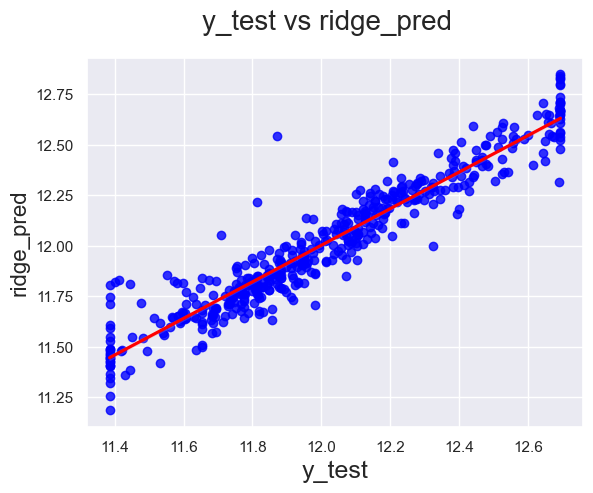

In [670]:
fig = plt.figure(dpi=100)
sns.regplot(x=y_test, y=ridge_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

#### Error Distribution

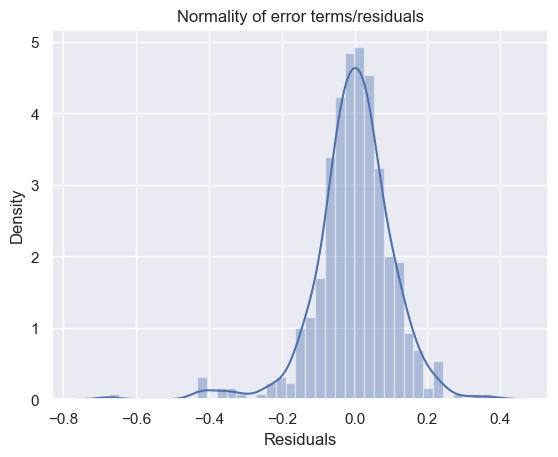

In [671]:
y_res=y_test-ridge_pred

sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

## Lasso Model Prediction

In [672]:
lasso_pred = lasso.predict(X_test1)

###  Plotting y_test and y_pred to understand the spread for lasso regression.

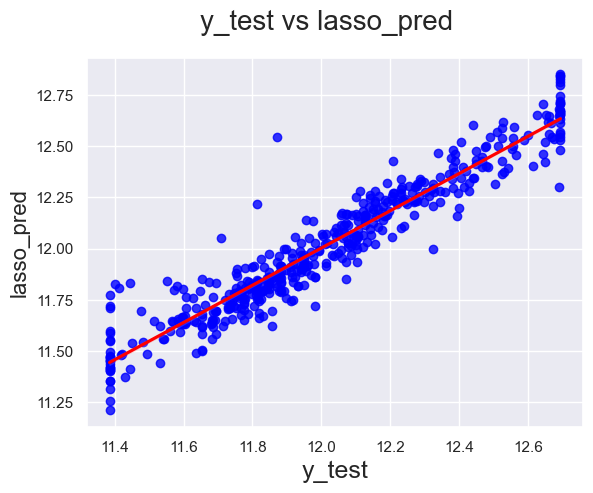

In [673]:
fig = plt.figure(dpi=100)
sns.regplot(x=y_test, y=lasso_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

#### Error Distribution

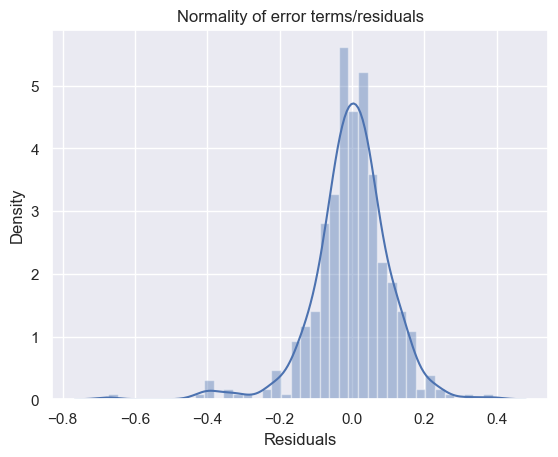

In [674]:
y_res=y_test-lasso_pred
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

## Changes in the Coefficients after Regularization

In [675]:
regularization_df = pd.DataFrame(index=X_train1.columns)
# betas.rows = X_train1.columns
regularization_df['Ridge'] = ridge.coef_
regularization_df['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
regularization_df = regularization_df[regularization_df['Ridge'] != 0 ]
regularization_df.sort_values(by=['Ridge','Lasso'],ascending=[False,False])

Ridge  \
GrLivArea                                                         0.363908   
RoofMatl_WdShngl                                                  0.177397   
RoofMatl_Tar&Grv                                                  0.173570   
OverallQual_Excellent                                             0.164521   
TotalBsmtSF                                                       0.162858   
SaleCondition_Alloca                                              0.158894   
BsmtFullBath_3                                                    0.149783   
GarageArea                                                        0.143551   
RoofMatl_CompShg                                                  0.134191   
SaleType_Oth                                                      0.131634   
Neighborhood_Crawfor                                              0.130496   
OverallQual_Very Good                                             0.130253   
RoofMatl_Roll                                                     0.128132   
LotArea                                                           0.110444   
SaleCondition_AdjLand                                             0.109943   
LandSlope_Sev                                                     0.108210   
BsmtFinSF1                                                        0.100698   
Condition1_RRNn                                                   0.100272   
GarageType_Basment                                                0.097343   
GarageType_Attchd                                                 0.096726   
Exterior2nd_CmentBd                                               0.096041   
Heating_Wall                                                      0.094906   
Heating_Grav                                                      0.092680   
YearRemodAdd                                                      0.092406   
ExterQual_Fa                                                      0.092076   
GarageType_BuiltIn                                                0.091932   
GarageType_Detchd                                                 0.090455   
Condition1_PosN                                                   0.088964   
MSSubClass_2-1/2 STORY ALL AGES                                   0.085410   
Heating_GasW                                                      0.085110   
MSZoning_FV                                                       0.083294   
Heating_GasA                                                      0.080252   
Neighborhood_StoneBr                                              0.079083   
Condition1_RRNe                                                   0.078639   
Neighborhood_ClearCr                                              0.078494   
Exterior2nd_Wd Sdng                                               0.076345   
Condition1_Norm                                                   0.072007   
HouseStyle_SLvl                                                   0.071810   
SaleCondition_Partial                                             0.070289   
Condition1_RRAn                                                   0.070004   
BsmtFullBath_2                                                    0.068808   
Fireplaces                                                        0.066877   
Functional_Typ                                                    0.065378   
OverallQual_Good                                                  0.059046   
Exterior1st_Stone                                                 0.058046   
Neighborhood_BrkSide                                              0.057966   
Exterior2nd_Stucco                                                0.057679   
SaleType_CWD                                                      0.056794   
Neighborhood_NridgHt                                              0.053157   
SaleCondition_Normal                                              0.053104   
RoofMatl_Metal                                                    0.049911   
OverallCond_E

# Conclusion

Surprise Housing Should consider to keep a check on above mentioned features affecting the price of the house.

It needs to be noted that, the higher values of positive coeeficients suggest a high sale value.
Some of those features are: 
- GrLivArea
- RoofMatl_WdShngl
- RoofMatl_Tar&Grv
- OverallQual_Excellent
- TotalBsmtSF
- SaleCondition_Alloca
- BsmtFullBath_3
- GarageArea
- RoofMatl_CompShg
- SaleType_Oth
- Neighborhood_Crawfor
- OverallQual_Very Good
- RoofMatl_Roll
- LotArea
- SaleCondition_AdjLand
- LandSlope_Sev
- BsmtFinSF1
- Condition1_RRNn
- GarageType_Basment

The higher values of negative coeeficients suggest a decrease in sale value.
Some of those features are:
- Age of the House
- Condition2_PosN
- OverallCond_Poor
- OverallCond_Fair

When the market value of the property is lower than the Predicted Sale Price, Surprise Housing should buy the property.